In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from pygimli.viewer.mpl import draw1DColumn, drawSensors
import statsmodels.api as sm
from matplotlib.ticker import LogLocator, LogFormatter
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
from matplotlib.ticker import MultipleLocator
import matplotlib.image as mpimg
import matplotlib.cm as cm


In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [3]:
mesh_eastern = pg.load(dir+'pygimli/all_inversions/INV_Eastern_and_south/ERTManager/resistivity-pd.bms')
res_eastern = pg.load(dir+'pygimli/all_inversions/INV_Eastern_and_south/ERTManager/resistivity.vector')
cov_eastern = pg.load(dir+'pygimli/all_inversions/INV_Eastern_and_south/ERTManager/resistivity-cov.vector')

mesh_eastern_newrhoa = pg.load(dir+'pygimli/all_inversions/INV_eastern_new_rhoa/ERTManager/resistivity-pd.bms')
res_eastern_newrhoa = pg.load(dir+'pygimli/all_inversions/INV_eastern_new_rhoa/ERTManager/resistivity.vector')
cov_eastern_newrhoa = pg.load(dir+'pygimli/all_inversions/INV_eastern_new_rhoa/ERTManager/resistivity-cov.vector')

mesh_eastern_perpendicular = pg.load(dir+'pygimli/all_inversions/ERTManager_eastern_perpendicular/resistivity-pd.bms')
res_eastern_perpendicular = pg.load(dir+'pygimli/all_inversions/ERTManager_eastern_perpendicular/resistivity.vector')
cov_eastern_perpendicular = pg.load(dir+'pygimli/all_inversions/ERTManager_eastern_perpendicular/resistivity-cov.vector')

mesh_western = pg.load(dir+'pygimli/all_inversions/ERTManager_western/resistivity-pd.bms')
res_western = pg.load(dir+'pygimli/all_inversions/ERTManager_western/resistivity.vector')
cov_western = pg.load(dir+'pygimli/all_inversions/ERTManager_western/resistivity-cov.vector')

mesh_western_newrhoa = pg.load(dir+'pygimli/all_inversions/INV_western_new_rhoa/ERTManager/resistivity-pd.bms')
res_western_newrhoa = pg.load(dir+'pygimli/all_inversions/INV_western_new_rhoa/ERTManager/resistivity.vector')
cov_western_newrhoa = pg.load(dir+'pygimli/all_inversions/INV_western_new_rhoa/ERTManager/resistivity-cov.vector')

mesh_western_perpendicular = pg.load(dir+'pygimli/all_inversions/ERTManager_western_perpendicular/resistivity-pd.bms')
res_western_perpendicular = pg.load(dir+'pygimli/all_inversions/ERTManager_western_perpendicular/resistivity.vector')
cov_western_perpendicular = pg.load(dir+'pygimli/all_inversions/ERTManager_western_perpendicular/resistivity-cov.vector')

mesh_southeast = pg.load(dir+'pygimli/all_inversions/ERTManager_southeast/resistivity-pd.bms')
res_southeast = pg.load(dir+'pygimli/all_inversions/ERTManager_southeast/resistivity.vector')
cov_southeast = pg.load(dir+'pygimli/all_inversions/ERTManager_southeast/resistivity-cov.vector')

mesh_arenson = pg.load(dir+'pygimli/all_inversions/arenson_updated/ERTManager/resistivity-pd.bms')
res_arenson = pg.load(dir+'pygimli/all_inversions/arenson_updated/ERTManager/resistivity.vector')
cov_arenson = pg.load(dir+'pygimli/all_inversions/arenson_updated/ERTManager/resistivity-cov.vector')

mesh_eastern_center = pg.load(dir+'pygimli/all_inversions/INV_Eastern_centern/ERTManager/resistivity-pd.bms')
res_eastern_center = pg.load(dir+'pygimli/all_inversions/INV_Eastern_centern/ERTManager/resistivity.vector')
cov_eastern_center = pg.load(dir+'pygimli/all_inversions/INV_Eastern_centern/ERTManager/resistivity-cov.vector')

#3d modelling

mesh_thin = pg.load(dir+'pygimli/all_inversions/INV_3d_air_thin/ERTManager/resistivity-pd.bms')
res_thin = pg.load(dir+'pygimli/all_inversions/INV_3d_air_thin/ERTManager/resistivity.vector')
cov_thin = pg.load(dir+'pygimli/all_inversions/INV_3d_air_thin/ERTManager/resistivity-cov.vector')

mesh_mid = pg.load(dir+'pygimli/all_inversions/INV_3d_air_mid/ERTManager/resistivity-pd.bms')
res_mid = pg.load(dir+'pygimli/all_inversions/INV_3d_air_mid/ERTManager/resistivity.vector')
cov_mid = pg.load(dir+'pygimli/all_inversions/INV_3d_air_mid/ERTManager/resistivity-cov.vector')

mesh_wide = pg.load(dir+'pygimli/all_inversions/INV_3d_air_wide/ERTManager/resistivity-pd.bms')
res_wide = pg.load(dir+'pygimli/all_inversions/INV_3d_air_wide/ERTManager/resistivity.vector')
cov_wide = pg.load(dir+'pygimli/all_inversions/INV_3d_air_wide/ERTManager/resistivity-cov.vector')

Eastern - permafrost table

In [40]:
topography_coords = np.loadtxt(dir + "res2dinv_inputs/eastern_topo.txt")
xmin = -10
xmax = 385
ymin = -40
resolution_x = 0.1
resolution_y = 0.1
shave_off_top = 0.5 


interpolated_topography = interp1d(topography_coords[:, 0], topography_coords[:, 1], kind='linear', fill_value='extrapolate')


x = np.arange(xmin, xmax + resolution_x, resolution_x)


adjusted_topography = []


for x_val in x:
    y_val = interpolated_topography(x_val)
    adjusted_y_val = max(y_val - shave_off_top, ymin)  
    adjusted_topography.append(adjusted_y_val)


adjusted_topography = np.array(adjusted_topography)


grid_points = []

for x_val, y_val in zip(x, adjusted_topography):
    y_range = np.arange(y_val, ymin - resolution_y, -resolution_y)
    grid_points.extend([(x_val, y) for y in y_range])

grid_points = np.array(grid_points)

posVec = [pg.Pos(pos) for pos in zip(grid_points[:, 0], grid_points[:, 1])]


mesh_eastern_newrhoa.setCellMarkers(pg.IVector(mesh_eastern_newrhoa.cellCount()))

fopDP = PriorModelling(mesh_eastern_newrhoa, posVec)


resMesh = fopDP(res_eastern_newrhoa)

out = np.column_stack((grid_points[:, 0], grid_points[:, 1], resMesh))

x_values = out[:, 0]
y_values = out[:, 1]
resistivity_values = out[:, 2]


22/10/24 - 18:51:33 - pyGIMLi - INFO - Found 1 regions.


Log gradient method

In [41]:
top_permafrost_depths = []
permafrost_data = []
# Iterate over each unique x value
for x_value in np.unique(out[:, 0]):
    # Filter data for the current x value
    data_x = out[out[:, 0] == x_value]


    resistivity_gradient_log = np.diff(np.log10(data_x[:, 2])) / np.diff(data_x[:, 1])


    
    if x_value < 110:
        # Calculate the gradient up to the maximum depth
        valid_gradients_mask = (data_x[:-1, 2] >= 10) & (resistivity_gradient_log < 0) 
        valid_gradients = resistivity_gradient_log[valid_gradients_mask]
        valid_depths = data_x[:-1, 1][valid_gradients_mask]
        
    elif x_value > 240:
        # Calculate the gradient only up to depth 10
        valid_gradients_mask = (data_x[:-1, 2] >= 10) & (resistivity_gradient_log < 0) 
        valid_gradients = resistivity_gradient_log[valid_gradients_mask]
        valid_depths = data_x[:-1, 1][valid_gradients_mask]


    if len(valid_depths) > 0:
        top_permafrost_depth = valid_depths[0]
        gradient = valid_gradients[0]
        permafrost_data.append((x_value, top_permafrost_depth, gradient))

top_permafrost_depths = np.array(permafrost_data)


Simple cutoff method (100 ohmm)

In [20]:
top_permafrost_depths = []
permafrost_data = []

# Iterate over each unique x value
for x_value in np.unique(out[:, 0]):
    
    data_x = out[out[:, 0] == x_value]

    
    valid_depths_mask = np.log10(data_x[:, 2]) >= 2
    valid_depths = data_x[:, 1][valid_depths_mask]

    
    if len(valid_depths) > 0:
        top_permafrost_depth = valid_depths[0]  # First depth where resistivity exceeds 100
        resistivity_value = data_x[valid_depths_mask][0, 2]  # Get corresponding resistivity value
        
       
        permafrost_data.append((x_value, top_permafrost_depth, resistivity_value))


top_permafrost_depths = np.array(permafrost_data)


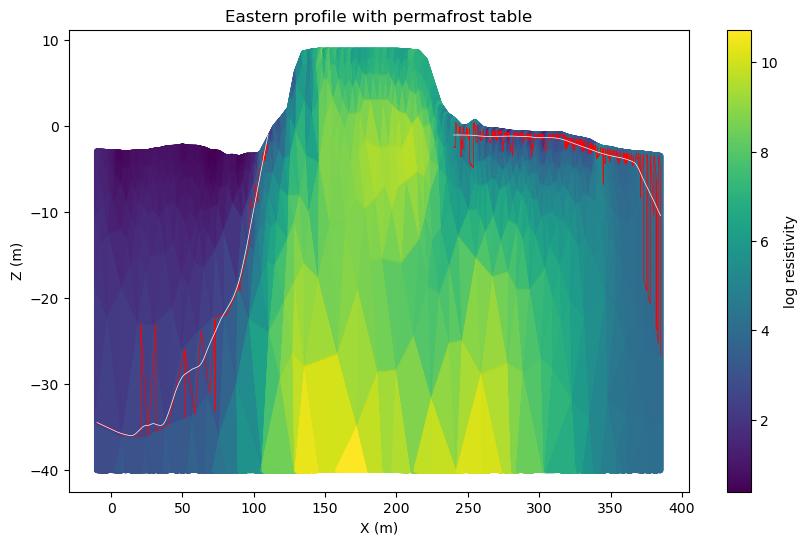

In [42]:
x_values = out[:, 0]
y_values = out[:, 1]
resistivity_values = out[:, 2]
ibpt_depth = top_permafrost_depths[:, 1]
ibpt_x = top_permafrost_depths[:, 0] 
section1_ibpt_depths = top_permafrost_depths[(top_permafrost_depths[:, 0] < 110)]
section2_ibpt_depths = top_permafrost_depths[(top_permafrost_depths[:, 0] > 240)]


lowess = sm.nonparametric.lowess
frac = 0.2  
ibpt_depth_smoothed1 = lowess(section1_ibpt_depths[:, 1], section1_ibpt_depths[:, 0], frac=frac)[:, 1]
ibpt_depth_smoothed2 = lowess(section2_ibpt_depths[:, 1], section2_ibpt_depths[:, 0], frac=frac)[:, 1]


plt.figure(figsize=(10, 6))

plt.scatter(x_values, y_values, c=np.log(resistivity_values), cmap='viridis', s=10)  
plt.colorbar(label='log resistivity')
plt.xlabel('X (m)')
plt.ylabel('Z (m)')
plt.title('Eastern profile with permafrost table')


# Plot unsmoothed data
plt.plot(section1_ibpt_depths[:, 0], section1_ibpt_depths[:, 1], color='r', linewidth=0.5)
plt.plot(section2_ibpt_depths[:, 0], section2_ibpt_depths[:, 1], color='r', linewidth=0.5)

# Plot smoothed data (commented out)
plt.plot(section1_ibpt_depths[:, 0], ibpt_depth_smoothed1, color='w', linewidth=0.5)
plt.plot(section2_ibpt_depths[:, 0], ibpt_depth_smoothed2, color='w', linewidth=0.5)

np.save(dir+ 'pygimli/eastern_newrhoa_perm_table_smooth1.npy', ibpt_depth_smoothed1)
np.save(dir+ 'pygimli/eastern_newrhoa_perm_table_smooth2.npy', ibpt_depth_smoothed2)
np.save(dir+ 'pygimli/eastern_newrhoa_perm_table1.npy', section1_ibpt_depths[:, 1])
np.save(dir+ 'pygimli/eastern_newrhoa_perm_table2.npy', section2_ibpt_depths[:, 1])
np.save(dir+ 'pygimli/eastern_newrhoa_perm_table_x1.npy', section1_ibpt_depths[:, 0])
np.save(dir+ 'pygimli/eastern_newrhoa_perm_table_x2.npy', section2_ibpt_depths[:, 0])


Western - permafrost table

In [46]:
topography_coords = np.loadtxt(dir + "res2dinv_inputs/western_topo.txt")
xmin = -10
xmax = 310
ymin = -40
resolution_x = 0.1
resolution_y = 0.1
shave_off_top = 0.1  # Amount to shave off from the top

interpolated_topography = interp1d(topography_coords[:, 0], topography_coords[:, 1], kind='linear', fill_value='extrapolate')


x = np.arange(xmin, xmax + resolution_x, resolution_x)


adjusted_topography = []


for x_val in x:
    y_val = interpolated_topography(x_val)
    adjusted_y_val = max(y_val - shave_off_top, ymin)  
    adjusted_topography.append(adjusted_y_val)


adjusted_topography = np.array(adjusted_topography)


grid_points = []

for x_val, y_val in zip(x, adjusted_topography):
    y_range = np.arange(y_val, ymin - resolution_y, -resolution_y)
    grid_points.extend([(x_val, y) for y in y_range])

grid_points = np.array(grid_points)

posVec = [pg.Pos(pos) for pos in zip(grid_points[:, 0], grid_points[:, 1])]


mesh_western_newrhoa.setCellMarkers(pg.IVector(mesh_western_newrhoa.cellCount()))

fopDP = PriorModelling(mesh_western_newrhoa, posVec)


resMesh = fopDP(res_western_newrhoa)

out = np.column_stack((grid_points[:, 0], grid_points[:, 1], resMesh))

x_values = out[:, 0]
y_values = out[:, 1]
resistivity_values = out[:, 2]

22/10/24 - 18:56:39 - pyGIMLi - INFO - Found 1 regions.


In [52]:
top_permafrost_depths = []
permafrost_data = []
# Iterate over each unique x value
for x_value in np.unique(out[:, 0]):
    # Filter data for the current x value
    data_x = out[out[:, 0] == x_value]

    resistivity_gradient_log = np.diff(np.log10(data_x[:, 2])) / np.diff(data_x[:, 1])
    
    if x_value < 110:
        # Calculate the gradient up to the maximum depth
        valid_gradients_mask = (data_x[:-1, 2] >= 10) & (resistivity_gradient_log < 0) 
        valid_gradients = resistivity_gradient_log[valid_gradients_mask]
        valid_depths = data_x[:-1, 1][valid_gradients_mask]
        
    elif x_value > 240:
        # Calculate the gradient only up to depth 10
        valid_gradients_mask = (data_x[:-1, 2] >= 10) & (resistivity_gradient_log < 0) 
        valid_gradients = resistivity_gradient_log[valid_gradients_mask]
        valid_depths = data_x[:-1, 1][valid_gradients_mask]


    if len(valid_depths) > 0:
        top_permafrost_depth = valid_depths[0]
        gradient = valid_gradients[0]
        permafrost_data.append((x_value, top_permafrost_depth, gradient))

top_permafrost_depths = np.array(permafrost_data)


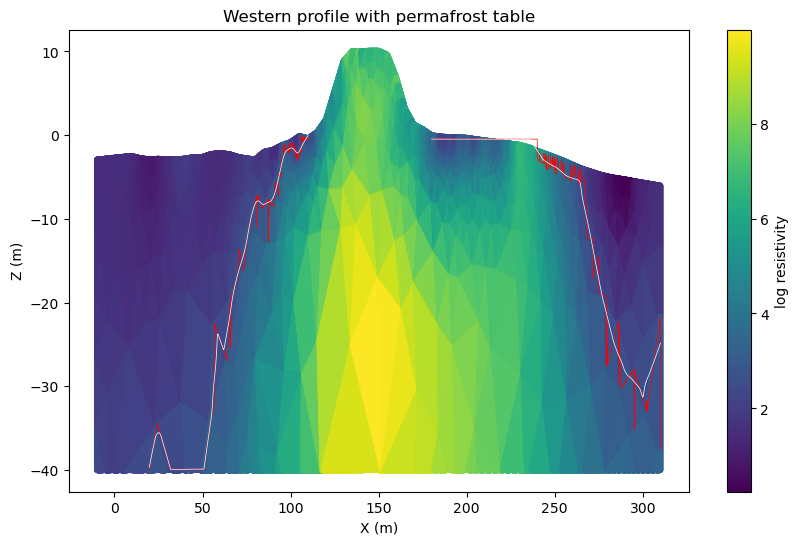

In [53]:
x_values = out[:, 0]
y_values = out[:, 1]
resistivity_values = out[:, 2]
ibpt_depth = top_permafrost_depths[:, 1]
ibpt_x = top_permafrost_depths[:, 0] 
section1_ibpt_depths = top_permafrost_depths[(top_permafrost_depths[:, 0] < 110)]
section2_ibpt_depths = top_permafrost_depths[(top_permafrost_depths[:, 0] > 180)]


lowess = sm.nonparametric.lowess
frac = 0.2  
ibpt_depth_smoothed1 = lowess(section1_ibpt_depths[:, 1], section1_ibpt_depths[:, 0], frac=frac)[:, 1]
ibpt_depth_smoothed2 = lowess(section2_ibpt_depths[:, 1], section2_ibpt_depths[:, 0], frac=frac)[:, 1]


plt.figure(figsize=(10, 6))

plt.scatter(x_values, y_values, c=np.log(resistivity_values), cmap='viridis', s=10)  
plt.colorbar(label='log resistivity')
plt.xlabel('X (m)')
plt.ylabel('Z (m)')
plt.title('Western profile with permafrost table')


# Plot unsmoothed data
plt.plot(section1_ibpt_depths[:, 0], section1_ibpt_depths[:, 1], color='r', linewidth=0.5)
plt.plot(section2_ibpt_depths[:, 0], section2_ibpt_depths[:, 1], color='r', linewidth=0.5)

# Plot smoothed data (commented out)
plt.plot(section1_ibpt_depths[:, 0], ibpt_depth_smoothed1, color='w', linewidth=0.5)
plt.plot(section2_ibpt_depths[:, 0], ibpt_depth_smoothed2, color='w', linewidth=0.5)

np.save(dir+ 'pygimli/western_newrhoa_perm_table_smooth1.npy', ibpt_depth_smoothed1)
np.save(dir+ 'pygimli/western_newrhoa_perm_table_smooth2.npy', ibpt_depth_smoothed2)
np.save(dir+ 'pygimli/western_newrhoa_perm_table1.npy', section1_ibpt_depths[:, 1])
np.save(dir+ 'pygimli/western_newrhoa_perm_table2.npy', section2_ibpt_depths[:, 1])
np.save(dir+ 'pygimli/western_newrhoa_perm_table_x1.npy', section1_ibpt_depths[:, 0])
np.save(dir+ 'pygimli/western_newrhoa_perm_table_x2.npy', section2_ibpt_depths[:, 0])

Text(0.5, 46.12222222222221, 'Logarithmic Scale of Resistivity (ohm-m)')

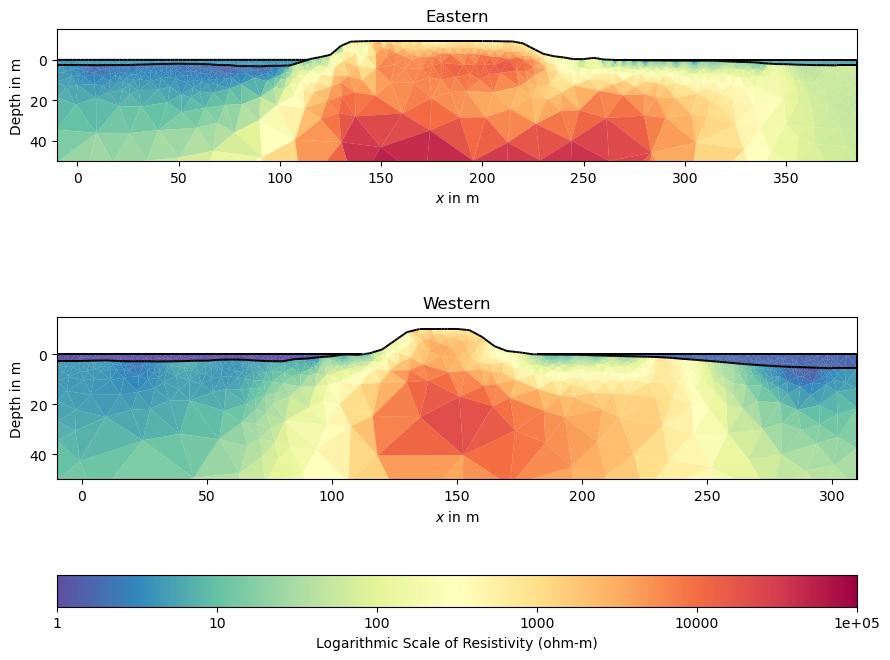

In [89]:
from matplotlib.ticker import LogLocator, LogFormatter
fig, ax = plt.subplots(2, 1, figsize=(10, 8))


# Plot on the subplots
pg.show(mesh_eastern_newrhoa, res_eastern_newrhoa, logScale=True, cMap="Spectral_r", ax=ax[0], cMin=1, cMax=100000,colorBar=False)
pg.show(mesh_western_newrhoa, res_western_newrhoa, logScale=True, cMap="Spectral_r", ax=ax[1], cMin=1, cMax=100000,colorBar=False)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9, wspace=0.2) 

# Add titles, labels, etc.
ax[0].set_title('Eastern')
ax[1].set_title('Western')
ax[0].set_ylim(-50, 15)
ax[1].set_ylim(-50, 15)
#ax.set_xlim(-11,381)


cax = fig.add_axes([0.1, 0.1, 0.8, 0.04])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=1, cMax=100000, logScale=True, cMap="Spectral_r")

# Set aspect ratio to equal for both subplots
#ax[0].set_aspect(2)
#ax[1].set_aspect(1.1)


cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)

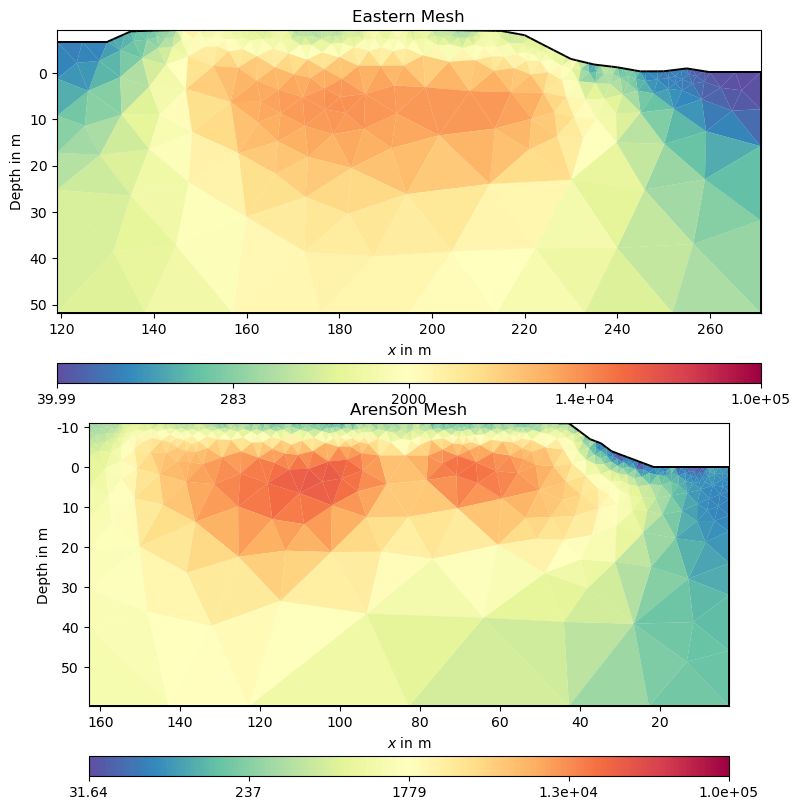

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))


# Plot on the subplots
pg.show(mesh_eastern_center, res_eastern_center, logScale=True, cMap="Spectral_r", ax=ax[0], cMin=0, cMax=100000)
pg.show(mesh_arenson, res_arenson, logScale=True, cMap="Spectral_r", ax=ax[1], cMin=0, cMax=100000)

# Add titles, labels, etc.
ax[0].set_title('Eastern Mesh')
ax[1].set_title('Arenson Mesh')
#ax[0].set_ylim(-50, 15)
#ax[1].set_ylim(-50, 15)
#ax[0].set_xlim(120, 275)
#ax[1].set_xlim(0, 155)
ax[1].invert_xaxis()

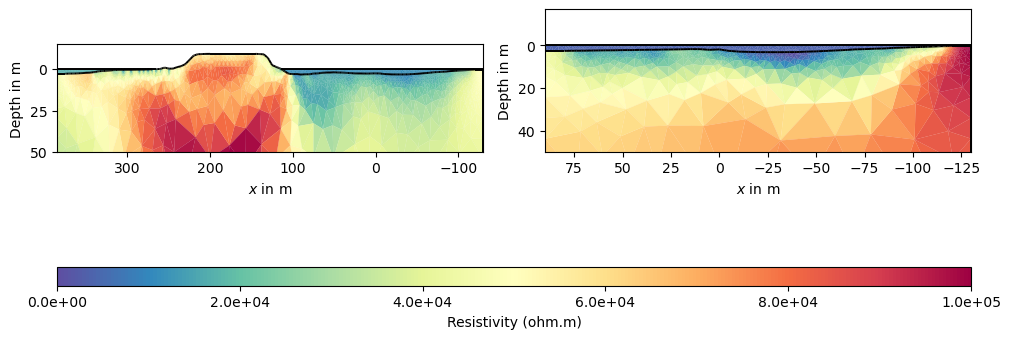

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pygimli as pg  # assuming pg is an alias for PyGIMLi

# Define common normalization and colormap for linear scale
cmin = 0
cmax = 100000
norm = mcolors.Normalize(vmin=cmin, vmax=cmax)
cmap = "Spectral_r"

# Create a 1x2 grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

# Plot on the subplots with the common normalization and colormap
_, img1 = pg.show(mesh_southeast, res_southeast, norm=norm, cMap=cmap, ax=ax[1], colorBar=False, logScale=True)
_, img0 = pg.show(mesh_eastern, res_eastern, norm=norm, cMap=cmap, ax=ax[0], colorBar=False, logScale=True)

# Add titles, labels, etc.
# ax[1].set_title('Eastern Mesh')
# ax[0].set_title('Southeast Mesh')
ax[1].set_ylim(-50, 17)
ax[0].set_ylim(-50, 15)
ax[0].invert_xaxis()
ax[1].invert_xaxis()

# Set aspect ratio to equal for both subplots
ax[0].set_aspect(2)
ax[1].set_aspect(1.1)

# Create a shared colorbar using the normalization
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for ScalarMappable

cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', format='%.1e', aspect=50)
cbar.set_label('Resistivity (ohm.m)')  # Customize the label as needed

#plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the colorbar
plt.show()



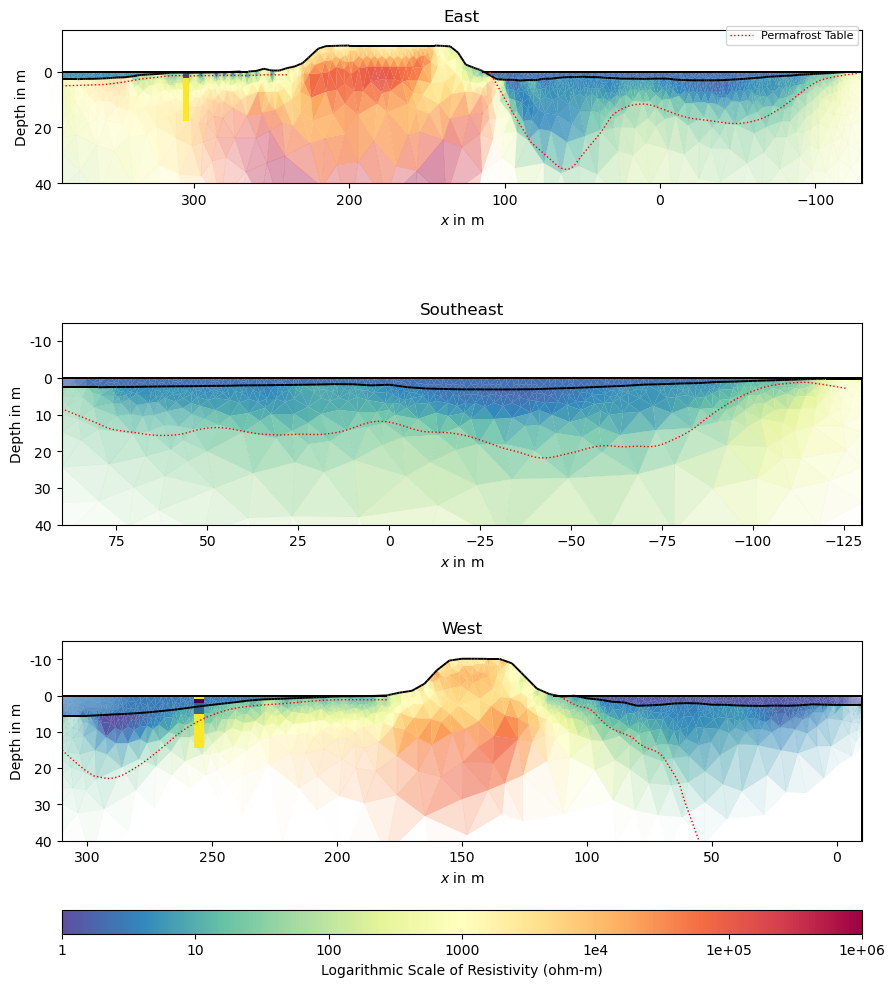

In [14]:
from matplotlib.ticker import LogLocator, LogFormatter

borehole4 = pd.read_csv(dir + "pygimli/borehole4.csv")
borehole2 = pd.read_csv(dir + "pygimli/borehole2.csv")

AL = np.loadtxt(dir + "pygimli/AL_eastern.txt")

e_permafrost_table1 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table1.npy')
e_permafrost_table_smooth1 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table_smooth1.npy')
e_permafrost_table_x1 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table_x1.npy')

e_permafrost_table2 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table2.npy')
e_permafrost_table_smooth2 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table_smooth2.npy')
e_permafrost_table_x2 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table_x2.npy')

s_permafrost_table = np.load(dir+ 'pygimli/southeast_perm_table.npy')
s_permafrost_table_smooth = np.load(dir+ 'pygimli/southeast_perm_table_smooth.npy')
s_permafrost_table_x = np.load(dir+ 'pygimli/southeast_perm_table_x.npy')

w_permafrost_table1 = np.load(dir+ 'pygimli/western_perm_table1.npy')
w_permafrost_table_smooth1 = np.load(dir+ 'pygimli/western_perm_table_smooth1.npy')
w_permafrost_table_x1 = np.load(dir+ 'pygimli/western_perm_table_x1.npy')

w_permafrost_table2 = np.load(dir+ 'pygimli/western_perm_table2.npy')
w_permafrost_table_smooth2 = np.load(dir+ 'pygimli/western_perm_table_smooth2.npy')
w_permafrost_table_x2 = np.load(dir+ 'pygimli/western_perm_table_x2.npy')

x_e = borehole4['x']
z_e = borehole4['z']
r_e = borehole4['r']

x_w = borehole2['x']
z_w = borehole2['z']
r_w = borehole2['r']

x_AL = AL[0]
z_AL = AL[1]


fig, ax = plt.subplots(3, 1, figsize=(10, 12))  
#fig, ax = plt.subplots(1, 2, figsize=(10, 10))

pg.show(mesh_eastern, res_eastern, logScale=True, cMap="Spectral_r", ax=ax[0], colorBar=False, cMin=1, cMax=100000, coverage=cov_eastern)
pg.show(mesh_southeast, res_southeast, logScale=True, cMap="Spectral_r", ax=ax[1], colorBar=False, cMin=1, cMax=100000, coverage=cov_southeast)
pg.show(mesh_western, res_western, logScale=True, cMap="Spectral_r", ax=ax[2], colorBar=False, cMin=1, cMax=100000, coverage=cov_western)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.2) 


cax = fig.add_axes([0.1, 0.1, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=1, cMax=1000000, logScale=True, cMap="Spectral_r")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)

ax[1].set_title('Southeast')
ax[0].set_title('East')
ax[2].set_title('West')

ax[1].set_ylim(-40, 15)
ax[0].set_ylim(-40, 15)
ax[2].set_ylim(-40, 15)

ax[0].invert_xaxis()
ax[1].invert_xaxis()
ax[2].invert_xaxis()

ax[0].set_aspect(1.8)
ax[1].set_aspect(1.01)
ax[2].set_aspect(1.45)

zz_e = np.abs(z_e)
iz_e = np.argsort(z_e)
dz_e = np.diff(zz_e[iz_e])
thk_e = np.hstack([dz_e, dz_e[-1]])
ztop_e = -zz_e[iz_e[0]]-dz_e[0]/2
colkw_e = dict(x=x_e[0], val=r_e[iz_e], thk=thk_e, width=4, ztopo=ztop_e)
draw1DColumn(ax[0], **colkw_e)

zz_w = np.abs(z_w)
iz_w = np.argsort(z_w)
dz_w = np.diff(zz_w[iz_w])
thk_w = np.hstack([dz_w, dz_w[-1]])
ztop_w = -zz_w[iz_w[0]]-dz_w[0]/2
colkw_w = dict(x=x_w[0], val=r_w[iz_w], thk=thk_w, width=4, ztopo=ztop_w)
draw1DColumn(ax[2], **colkw_w)

line1, = ax[0].plot(e_permafrost_table_x1, e_permafrost_table_smooth1, ":", linewidth=1, color='red', label='Permafrost Table')
line2, = ax[0].plot(e_permafrost_table_x2, e_permafrost_table_smooth2, ":", linewidth=1, color='red')
line3, = ax[1].plot(s_permafrost_table_x, s_permafrost_table_smooth, ":", linewidth=1, color='red')
line4, = ax[2].plot(w_permafrost_table_x1, w_permafrost_table_smooth1, ":", linewidth=1, color='red')
line5, = ax[2].plot(w_permafrost_table_x2, w_permafrost_table_smooth2, ":", linewidth=1, color='red')

#line1, = ax[0].plot(e_permafrost_table_x, e_permafrost_table, ":", linewidth=1, color='red', label='Permafrost Table')
#line2, = ax[1].plot(s_permafrost_table_x, s_permafrost_table, ":", linewidth=1, color='red')
#line2, = ax[2].plot(w_permafrost_table_x, w_permafrost_table, ":", linewidth=1, color='red')
#ax[0].plot(x_AL, z_AL, 'g_', linewidth=0.1)

ax[0].legend(loc=(0.83, 0.9), fontsize=8)

plt.show()



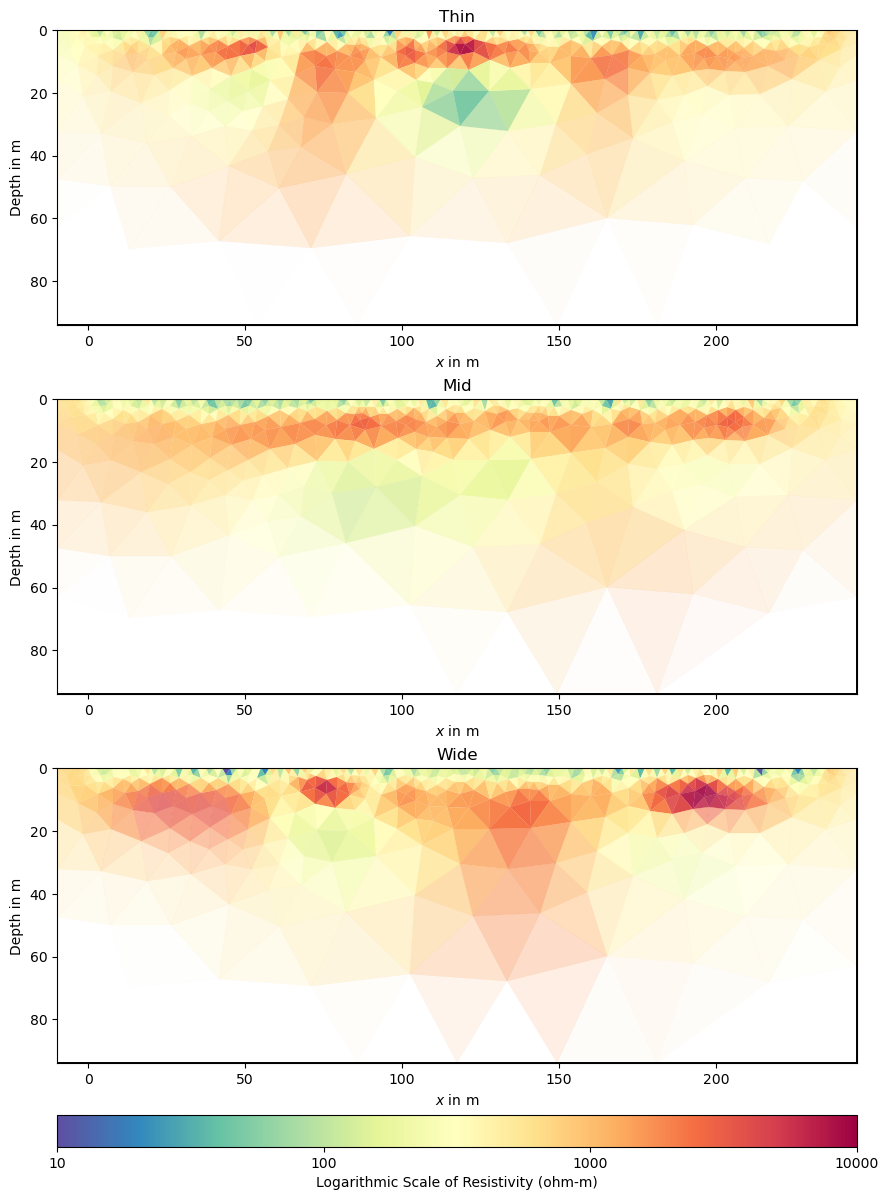

In [73]:
from matplotlib.ticker import LogLocator, LogFormatter



fig, ax = plt.subplots(3, 1, figsize=(10, 16))  
#fig, ax = plt.subplots(1, 2, figsize=(10, 10))

pg.show(mesh_thin, res_thin, logScale=True, cMap="Spectral_r", ax=ax[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_thin, sharex=True)
pg.show(mesh_mid, res_mid, logScale=True, cMap="Spectral_r", ax=ax[1], colorBar=False, cMin=10, cMax=10000, coverage=cov_mid, sharex=True)
pg.show(mesh_wide, res_wide, logScale=True, cMap="Spectral_r", ax=ax[2], colorBar=False, cMin=10, cMax=10000, coverage=cov_wide, sharex=True)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.5) 


cax = fig.add_axes([0.1, 0.15, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=10, cMax=10000, logScale=True, cMap="Spectral_r")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)

ax[0].set_title('Thin')
ax[1].set_title('Mid')
ax[2].set_title('Wide')




plt.show()



06/09/24 - 09:36:00 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
06/09/24 - 09:36:00 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
06/09/24 - 09:36:00 - pyGIMLi - INFO - Cache C:\Users\mealiy001\Projects\tuk_island\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (1.4s x 85): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4653169337310691530
06/09/24 - 09:36:00 - pyGIMLi - INFO - Cache C:\Users\mealiy001\Projects\tuk_island\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 85): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\982929574901384086
06/09/24 - 09:36:00 - pyGIMLi - INFO - Cache C:\Users\mealiy001\Projects\tuk_island\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (4.3s x 86): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\162931402017577431
06/09/24 - 09:36:00 - pyGIMLi - INFO - Cache C:\Users\mealiy001\Projects\tuk_island\gimli\pygimli\physics\ert\e

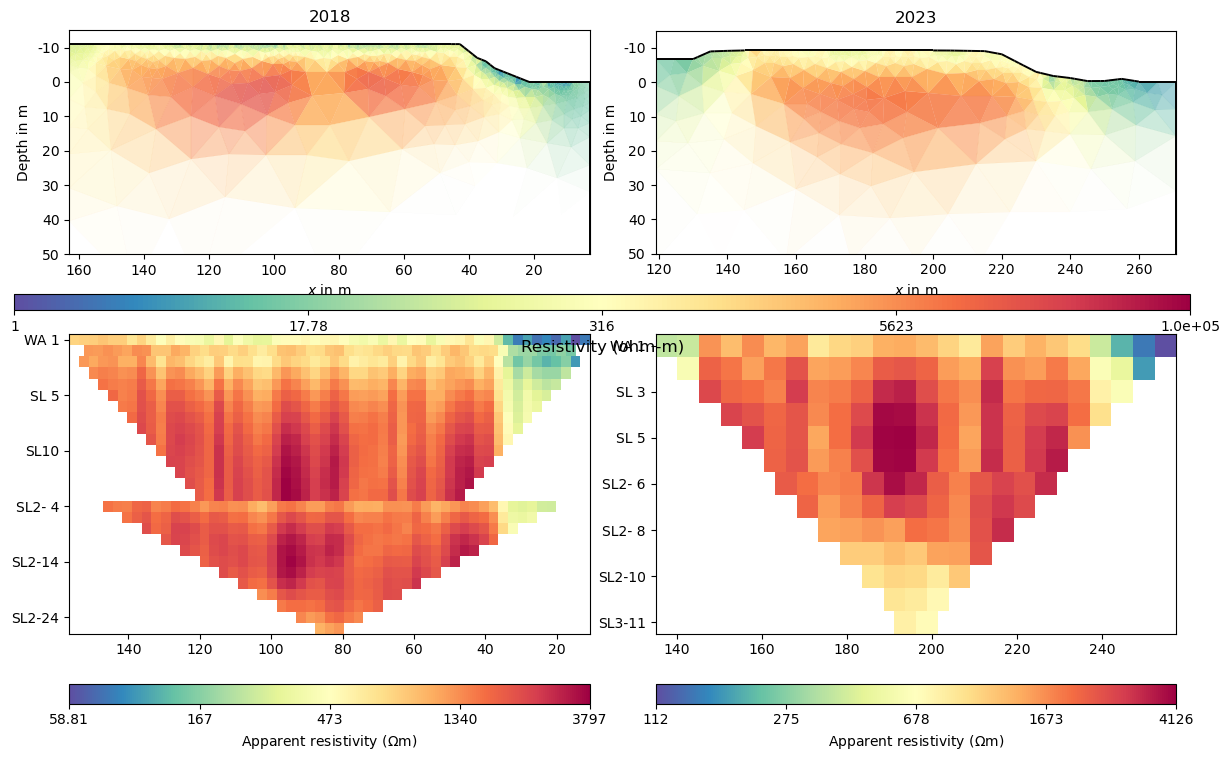

In [38]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pygimli as pg  # assuming pg is an alias for PyGIMLi
from matplotlib.ticker import MultipleLocator

data_e = ert.load(dir+"res2dinv_inputs/transects_split_in_three/amphibious_ERT_eastern_transect_gps_center.dat")
data_a = ert.load(dir+"processing/arenson/arenson_updated.dat")

#data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data_e['k'] = ert.createGeometricFactors(data_e, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data_e)
data_e['err'] = ert.estimateError(data_e, relativeError=0.03, absoluteUError=5e-5)

data_a['k'] = ert.createGeometricFactors(data_a, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data_a)
data_a['err'] = ert.estimateError(data_a, relativeError=0.03, absoluteUError=5e-5)

# Define common normalization and colormap for linear scale
cmin = 10
cmax = 100000
cmap = "Spectral_r"

# Create a 1x2 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Plot on the subplots with the common normalization and colormap
pg.show(mesh_arenson, res_arenson, cMap=cmap, ax=ax[0][0], colorBar=False, cMin=cmin, cMax=cmax,logScale=True, sharey = True, coverage=cov_arenson)
pg.show(mesh_eastern_center, res_eastern_center, cMap=cmap, ax=ax[0][1], colorBar=False, cMin=cmin, cMax=cmax, logScale=True, sharey = True, coverage=cov_eastern_center)
ert.showERTData(data_a, ax = ax[1][0], colorBar=True, sharey = True)
ert.showERTData(data_e, ax = ax[1][1], colorBar=True, sharey = True)

cax1 = fig.add_axes([0.01, 0.54, 0.98, 0.02])  
colorbar1 = pg.viewer.mpl.createColorBarOnly(ax=cax1, cMin=1, cMax=100000, logScale=True, cMap="Spectral_r")


ax[0][1].set_title('2023')
ax[0][0].set_title('2018')

ax[0][0].set_ylim(-50, 15)
ax[0][1].set_ylim(-50, 15)
#ax[0].set_xlim(120, 275)
#ax[1].set_xlim(0, 155)
ax[0][0].invert_xaxis()
ax[1][0].invert_xaxis()
# Set aspect ratio to equal for both subplots
#ax[0].set_aspect(2)
ax[0][0].set_aspect(1.06)

ax[0][0].xaxis.set_major_locator(MultipleLocator(20))
ax[0][0].xaxis.set_major_locator(MultipleLocator(20))

#tick_positions1 = [160, 140, 120, 100, 80, 60, 40, 20]
#tick_labels1 = ['0', '20', '40', '60', '80', '100', '120', '140']
#ax[1].set_xticks(tick_positions1)
#ax[1].set_xticklabels(tick_labels1)


#tick_positions1 = [160, 140, 120, 100, 80, 60, 40, 20]
#tick_labels1 = ['0', '20', '40', '60', '80', '100', '120', '140']
#ax[1].set_xticks(tick_positions1)
#ax[1].set_xticklabels(tick_labels1)

#cax.xaxis.set_major_locator(LogLocator(base=10.0))
#cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax1.set_xlabel('Resistivity (ohm-m)', fontsize=12)
#plt.tight_layout()  # Adjust layout to fit the colorbar
#plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9) 
plt.show()



06/09/24 - 09:38:26 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


06/09/24 - 09:38:26 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
06/09/24 - 09:38:26 - pyGIMLi - INFO - Cache C:\Users\mealiy001\Projects\tuk_island\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (1.4s x 88): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4653169337310691530
06/09/24 - 09:38:26 - pyGIMLi - INFO - Cache C:\Users\mealiy001\Projects\tuk_island\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 88): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\982929574901384086
06/09/24 - 09:38:26 - pyGIMLi - INFO - Cache C:\Users\mealiy001\Projects\tuk_island\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (4.3s x 89): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\162931402017577431
06/09/24 - 09:38:26 - pyGIMLi - INFO - Cache C:\Users\mealiy001\Projects\tuk_island\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 89): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache

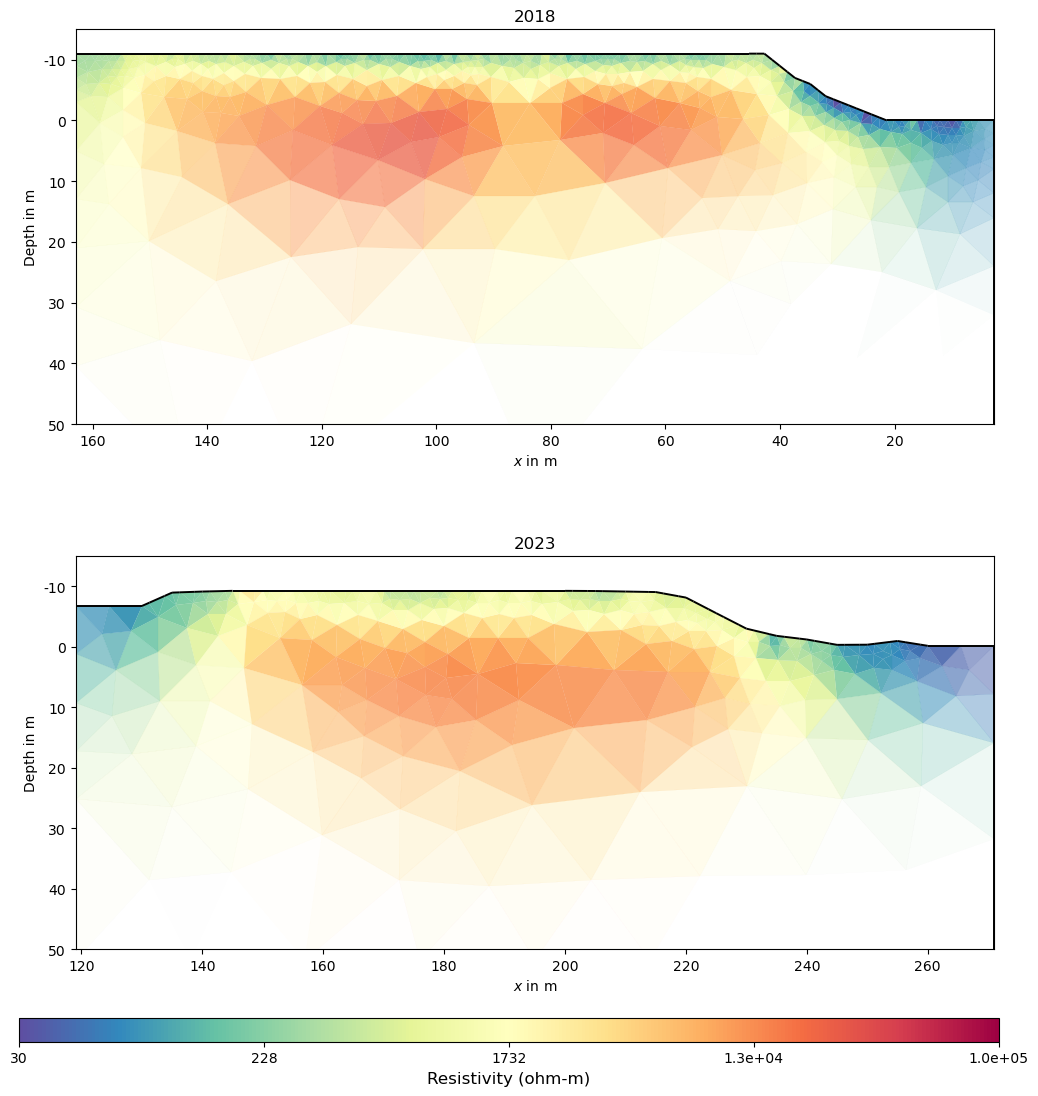

In [42]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pygimli as pg  # assuming pg is an alias for PyGIMLi
from matplotlib.ticker import MultipleLocator

data_e = ert.load(dir+"res2dinv_inputs/transects_split_in_three/amphibious_ERT_eastern_transect_gps_center.dat")
data_a = ert.load(dir+"processing/arenson/arenson_updated.dat")

#data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data_e['k'] = ert.createGeometricFactors(data_e, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data_e)
data_e['err'] = ert.estimateError(data_e, relativeError=0.03, absoluteUError=5e-5)

data_a['k'] = ert.createGeometricFactors(data_a, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data_a)
data_a['err'] = ert.estimateError(data_a, relativeError=0.03, absoluteUError=5e-5)

# Define common normalization and colormap for linear scale
cmin = 30
cmax = 100000
cmap = "Spectral_r"

# Create a 1x2 grid of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot on the subplots with the common normalization and colormap
pg.show(mesh_arenson, res_arenson, cMap=cmap, ax=ax[0], colorBar=False, cMin=cmin, cMax=cmax,logScale=True, sharey = True, coverage=cov_arenson)
pg.show(mesh_eastern_center, res_eastern_center, cMap=cmap, ax=ax[1], colorBar=False, cMin=cmin, cMax=cmax, logScale=True, sharey = True, coverage=cov_eastern_center)


cax1 = fig.add_axes([0.01, 0.04, 0.98, 0.02])  
colorbar1 = pg.viewer.mpl.createColorBarOnly(ax=cax1, cMin=cmin, cMax=cmax, logScale=True, cMap="Spectral_r")


ax[1].set_title('2023')
ax[0].set_title('2018')

ax[0].set_ylim(-50, 15)
ax[1].set_ylim(-50, 15)

ax[0].invert_xaxis()
#ax[1].invert_xaxis()

ax[0].set_aspect(1.06)

ax[0].xaxis.set_major_locator(MultipleLocator(20))
ax[0].xaxis.set_major_locator(MultipleLocator(20))


cax1.set_xlabel('Resistivity (ohm-m)', fontsize=12)

plt.show()



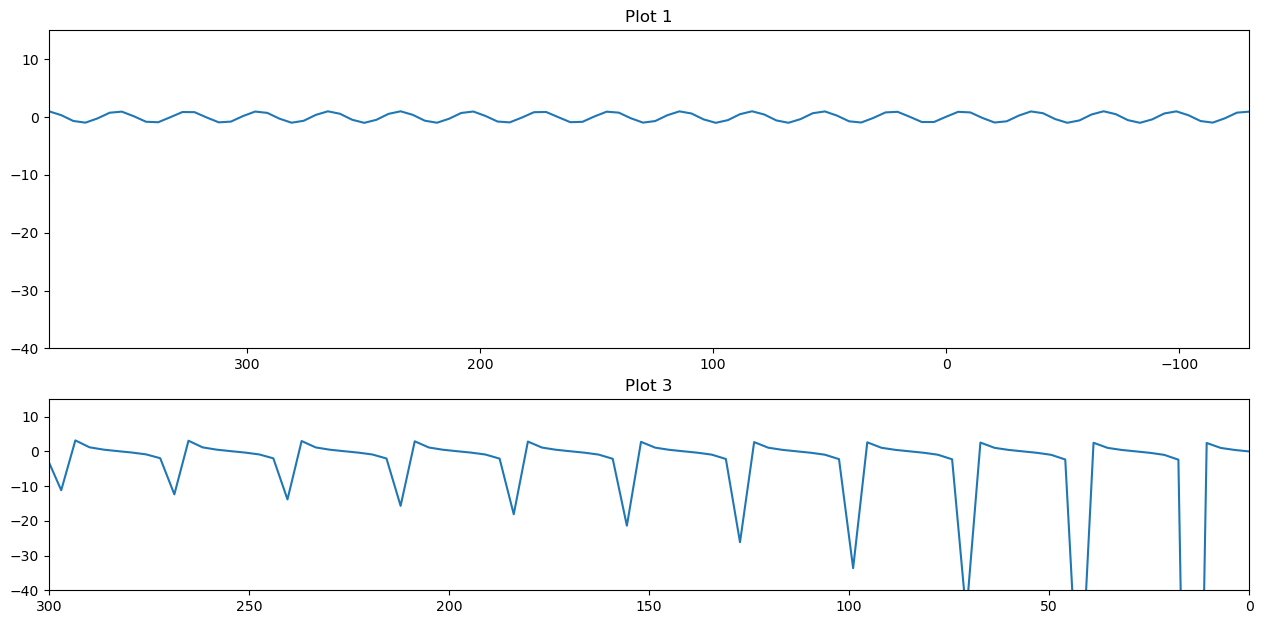

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Example data for plotting
x1 = np.linspace(385, -130, 100)
y1 = np.sin(x1)

#x2 = np.linspace(80, -120, 100)
#y2 = np.cos(x2)

x3 = np.linspace(350, 0, 100)
y3 = np.tan(x3)

# Create a figure
fig = plt.figure(figsize=(30, 14))

# Define the GridSpec layout with specified ratios
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.6])

# Create the first subplot in the first row and first column
ax0 = fig.add_subplot(gs[0])
ax0.plot(x1, y1)
ax0.set_xlim(385, -130)
ax0.set_ylim(-40, 15)
ax0.set_title('Plot 1')

# Create the second subplot in the first row and second column
#ax1 = fig.add_subplot(gs[0, 1])
#ax1.plot(x2, y2)
#ax1.set_xlim(80, -120)
#ax1.set_ylim(-40, 15)
#ax1.set_title('Plot 2')

# Adjust the width ratio for Plot 3 by specifying the width ratio when adding the subplot
#gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1], width_ratios=[0.33, 0.726, 0.33])

# Create the third subplot in the second row and first column with adjusted width ratio
ax2 = fig.add_subplot(gs[1])
#ax3 = fig.add_subplot(gs[1, 0])
#ax4 = fig.add_subplot(gs[1, 2])
#ax3.remove()
#ax4.remove()
ax2.plot(x3, y3)
ax2.set_xlim(300, 0)
ax2.set_ylim(-40, 15)
ax2.set_title('Plot 3')

fig.subplots_adjust(left=0.3, right=0.7, bottom=0.3, top=0.7)

# Get the bounding boxes of the subplots
bbox0 = ax0.get_position()
#bbox1 = ax1.get_position()
bbox2 = ax2.get_position()

# Extract the coordinates from the bounding boxes
x0_0, y0_0, width_0, height_0 = bbox0.x0, bbox0.y0, bbox0.width, bbox0.height
#x0_1, y0_1, width_1, height_1 = bbox1.x0, bbox1.y0, bbox1.width, bbox1.height
x0_2, y0_2, width_2, height_2 = bbox2.x0, bbox2.y0, bbox2.width, bbox2.height


Values in val: [(0, -0.9, 'Ice'), (-0.9, -2.4, 'Unfrozen Matter'), (-2.4, -17.6, 'Ice Bonded Permafrost')]
Values in val: [(0, -0.9, 'Ice'), (-0.9, -2.1, 'Water'), (-2.1, -5.2, 'Unfrozen Matter'), (-5.2, -14.6, 'Ice Bonded Permafrost')]


Text(0.5, 326.1222222222222, 'Resistivity (Ohm-m)')

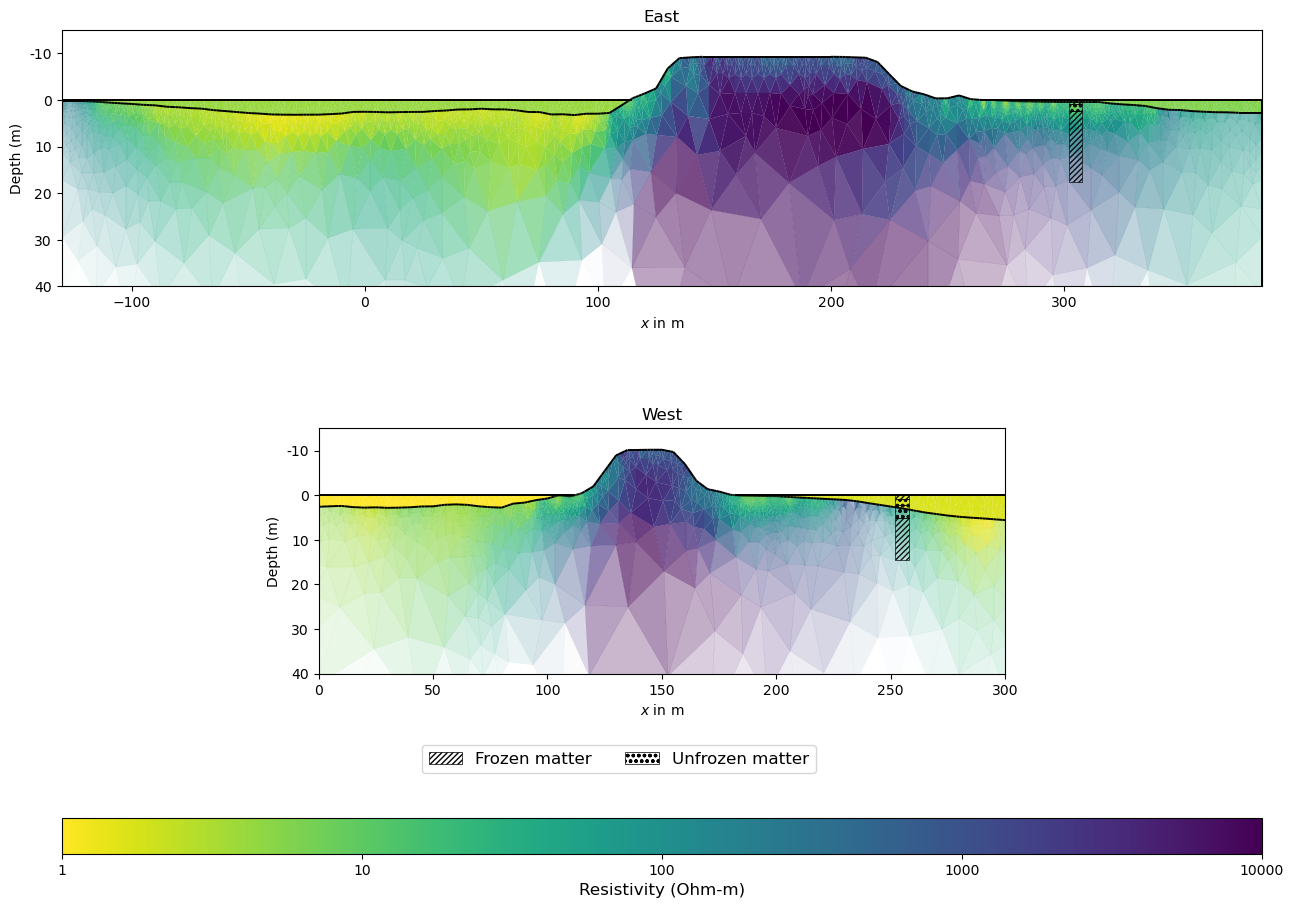

In [85]:
east_shore_df = pd.read_csv(dir + "pygimli/shorelines_gimli_eastern_and_south.csv")
west_shore_df = pd.read_csv(dir + "pygimli/shorelines_gimli_western.csv")

cMin=1
cMax=10000

# If you need NumPy arrays
east_shore = east_shore_df.to_numpy()
west_shore = west_shore_df.to_numpy()

borehole4 = pd.read_csv(dir + "pygimli/borehole4.csv")
borehole2 = pd.read_csv(dir + "pygimli/borehole2.csv")

def draw1DColumn(ax, x, val, thk, hatch_patterns):
    print("Values in val:", val)
    bottom = 0
    for v, t in zip(val, thk):
        material_type = v[2]  
        if material_type not in hatch_patterns:
            print("Error: Hatch pattern not found for material:", v)
            continue
        hatch = hatch_patterns[material_type]
        ax.bar(x, t, bottom=bottom, width=6, edgecolor='black', alpha=0.9, facecolor='none', hatch=hatch, linewidth=0.5)
        bottom += t


borehole2_data = [(0, -0.9, 'Ice'), (-0.9, -2.1, 'Water'), (-2.1, -5.2, 'Unfrozen Matter'), (-5.2, -14.6, 'Ice Bonded Permafrost')]
borehole4_data = [(0, -0.9, 'Ice'), (-0.9, -2.4, 'Unfrozen Matter'), (-2.4, -17.6, 'Ice Bonded Permafrost')]

hatch_patterns = {'Ice': '//////', 'Water': 'ooo', 'Unfrozen Matter': 'ooo', 'Ice Bonded Permafrost': '//////'}

AL_e = np.loadtxt(dir + "pygimli/AL_eastern.txt")
AL_w = np.loadtxt(dir + "pygimli/AL_western.txt")

e_permafrost_table1 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table1.npy')
e_permafrost_table_smooth1 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table_smooth1.npy')
e_permafrost_table_x1 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table_x1.npy')

e_permafrost_table2 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table2.npy')
e_permafrost_table_smooth2 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table_smooth2.npy')
e_permafrost_table_x2 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table_x2.npy')

w_permafrost_table1 = np.load(dir+ 'pygimli/western_newrhoa_perm_table1.npy')
w_permafrost_table_smooth1 = np.load(dir+ 'pygimli/western_newrhoa_perm_table_smooth1.npy')
w_permafrost_table_x1 = np.load(dir+ 'pygimli/western_newrhoa_perm_table_x1.npy')

w_permafrost_table2 = np.load(dir+ 'pygimli/western_newrhoa_perm_table2.npy')
w_permafrost_table_smooth2 = np.load(dir+ 'pygimli/western_newrhoa_perm_table_smooth2.npy')
w_permafrost_table_x2 = np.load(dir+ 'pygimli/western_newrhoa_perm_table_x2.npy')

x_AL_e = AL_e[0]
z_AL_e = AL_e[1]
x_AL_w = AL_w[0]
z_AL_w = AL_w[1]

fig, ax = plt.subplots(2, 1, figsize=(30, 18))
ax0 = ax[0]
#ax1 = ax[0,1]
ax2 = ax[1]
#ax_bottom = ax[1, 1]
#ax_bottom.remove()

pg.show(mesh_eastern_newrhoa, res_eastern_newrhoa,sharey=True, logScale=True, cMap="viridis_r", ax=ax0, cMin=cMin, cMax=cMax, colorBar=False, coverage=cov_eastern_newrhoa)
#pg.show(mesh_southeast, res_southeast,  logScale=True, sharey=True, cMap="Spectral_r", ax=ax1, colorBar=False, cMin=1, cMax=100000, coverage=cov_southeast)
pg.show(mesh_western_newrhoa, res_western_newrhoa, sharey=True, logScale=True, cMap="viridis_r", ax=ax2, cMin=cMin, cMax=cMax, colorBar=False, coverage=cov_western_newrhoa)


ax0.set_ylim(-40, 15)
ax0.set_ylabel("Depth (m)")
#ax0.set_xlim()
#ax1.set_ylim(-40, 15)
#ax1.set_xlim(-120, 80)
ax2.set_ylim(-40, 15)
ax2.set_xlim(0, 300)


ax0.set_title('East')
#ax1.set_title('Southeast')
ax2.set_title('West')
ax2.set_ylabel("Depth (m)")

ax0.set_position([x0_0, y0_0, width_0, height_0])
#ax1.set_position([x0_1, y0_1, width_1, height_1])
ax2.set_position([x0_2, y0_2, width_2, height_2])

ax0.set_aspect(2)
#ax1.set_aspect(1.9)
ax2.set_aspect(1.95)

#ax0.invert_xaxis()
#ax1.invert_xaxis()
#ax2.invert_xaxis()

draw1DColumn(ax0, 305, borehole4_data, [item[1] - item[0] for item in borehole4_data], hatch_patterns)
draw1DColumn(ax2, 255, borehole2_data, [item[1] - item[0] for item in borehole2_data], hatch_patterns)


#line1, = ax0.plot(e_permafrost_table_x1, e_permafrost_table_smooth1, ":", linewidth=1, color='red', label='Permafrost Table')
#line2, = ax0.plot(e_permafrost_table_x2, e_permafrost_table_smooth2, ":", linewidth=1, color='red')
#line3, = ax1.plot(s_permafrost_table_x, s_permafrost_table_smooth, ":", linewidth=1, color='red')
#line4, = ax2.plot(w_permafrost_table_x1, w_permafrost_table_smooth1, ":", linewidth=1, color='red')
#line5, = ax2.plot(w_permafrost_table_x2, w_permafrost_table_smooth2, ":", linewidth=1, color='red')
#vline1 = ax0.axvline(x=80, color='gray', linestyle='-', linewidth=0.1, label='_nolegend_')
#vline2 = ax1.axvline(x=-10, color='gray', linestyle='-', linewidth=0.1, label='_nolegend_')
#ax0.add_patch(Rectangle((80, -40), -90, 55, linewidth=0.1, edgecolor='black', facecolor='gray', alpha=0.15, label='East and Southeast overlap'))
#ax1.add_patch(Rectangle((80, -40), -90, 55, linewidth=0.1, edgecolor='black', facecolor='gray', alpha=0.15))
#ax1.xaxis.set_major_locator(MultipleLocator(50))
#ax0.plot(x_AL_e, z_AL_e, 'g_', linewidth=1)
#ax2.plot(x_AL_w, z_AL_w, 'g_', linewidth=1)

hatch_patterns = {'Frozen matter': '//////', 'Unfrozen matter': 'ooo'}
handles, labels = ax0.get_legend_handles_labels()
legend_patches = [Rectangle((0, 0), 1, 1, fc='none', ec='black', lw=0.5, hatch=hatch_patterns[mat]) for mat in hatch_patterns]
#extended_symbol_patch = plt.Line2D([0, 0.5], [0, 0], color='g', linewidth=0.5)
all_handles = handles + legend_patches 
#ax0.legend(handles=all_handles, labels=labels + list(hatch_patterns.keys()) + ['Active Layer Probe'], loc=(0.43, -2.6), fontsize=8, ncol=2)
#ax2.legend(handles=all_handles, labels=labels + list(hatch_patterns.keys()), loc='center', fontsize=10, ncol=3)
ax0.legend(handles=all_handles, labels=labels + list(hatch_patterns.keys()), loc=(0.3, -1.9), fontsize=12, ncol=3)
cax = fig.add_axes([0.3, 0.2, 0.4, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, logScale=True, cMin=cMin, cMax= cMax, cMap="viridis_r")

#plt.subplots_adjust(hspace=0)
cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Resistivity (Ohm-m)', fontsize=12)

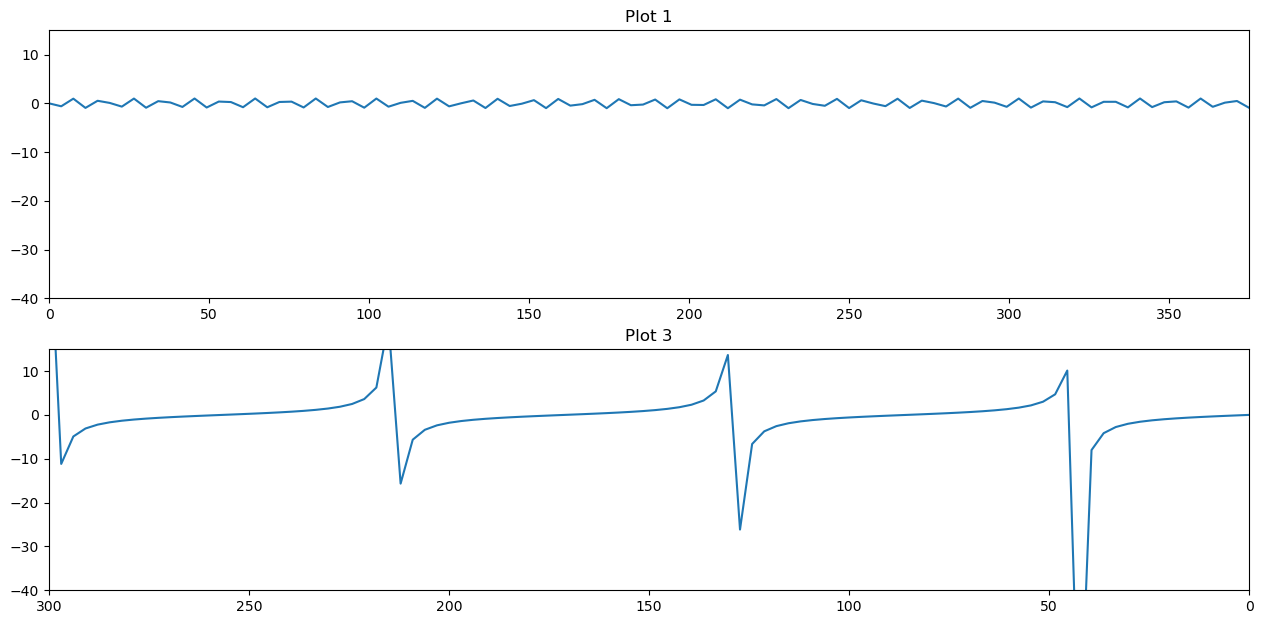

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Example data for plotting
x1 = np.linspace(375, 0, 100)
y1 = np.sin(x1)

#x2 = np.linspace(80, -120, 100)
#y2 = np.cos(x2)

x3 = np.linspace(300, 0, 100)
y3 = np.tan(x3)

# Create a figure
fig = plt.figure(figsize=(30, 14))

# Define the GridSpec layout with specified ratios
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.9])

# Create the first subplot in the first row and first column
ax0 = fig.add_subplot(gs[0])
ax0.plot(x1, y1)
ax0.set_xlim(0, 375)
ax0.set_ylim(-40, 15)
ax0.set_title('Plot 1')

# Create the second subplot in the first row and second column
#ax1 = fig.add_subplot(gs[0, 1])
#ax1.plot(x2, y2)
#ax1.set_xlim(80, -120)
#ax1.set_ylim(-40, 15)
#ax1.set_title('Plot 2')

# Adjust the width ratio for Plot 3 by specifying the width ratio when adding the subplot
#gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1], width_ratios=[0.33, 0.726, 0.33])

# Create the third subplot in the second row and first column with adjusted width ratio
ax2 = fig.add_subplot(gs[1])
#ax3 = fig.add_subplot(gs[1, 0])
#ax4 = fig.add_subplot(gs[1, 2])
#ax3.remove()
#ax4.remove()
ax2.plot(x3, y3)
ax2.set_xlim(300, 0)
ax2.set_ylim(-40, 15)
ax2.set_title('Plot 3')

fig.subplots_adjust(left=0.3, right=0.7, bottom=0.3, top=0.7)

# Get the bounding boxes of the subplots
bbox0 = ax0.get_position()
#bbox1 = ax1.get_position()
bbox2 = ax2.get_position()

# Extract the coordinates from the bounding boxes
x0_0, y0_0, width_0, height_0 = bbox0.x0, bbox0.y0, bbox0.width, bbox0.height
#x0_1, y0_1, width_1, height_1 = bbox1.x0, bbox1.y0, bbox1.width, bbox1.height
x0_2, y0_2, width_2, height_2 = bbox2.x0, bbox2.y0, bbox2.width, bbox2.height


Values in val: [(0, -0.9, 'Ice'), (-0.9, -2.4, 'Unfrozen Matter'), (-2.4, -17.6, 'Ice Bonded Permafrost')]
Values in val: [(0, -0.9, 'Ice'), (-0.9, -2.1, 'Water'), (-2.1, -5.2, 'Unfrozen Matter'), (-5.2, -14.6, 'Ice Bonded Permafrost')]


array([174, 188, 189, 208, 209, 211, 213, 221, 236, 238, 243, 244, 256,
       258, 259, 261, 283, 284], dtype=int64)

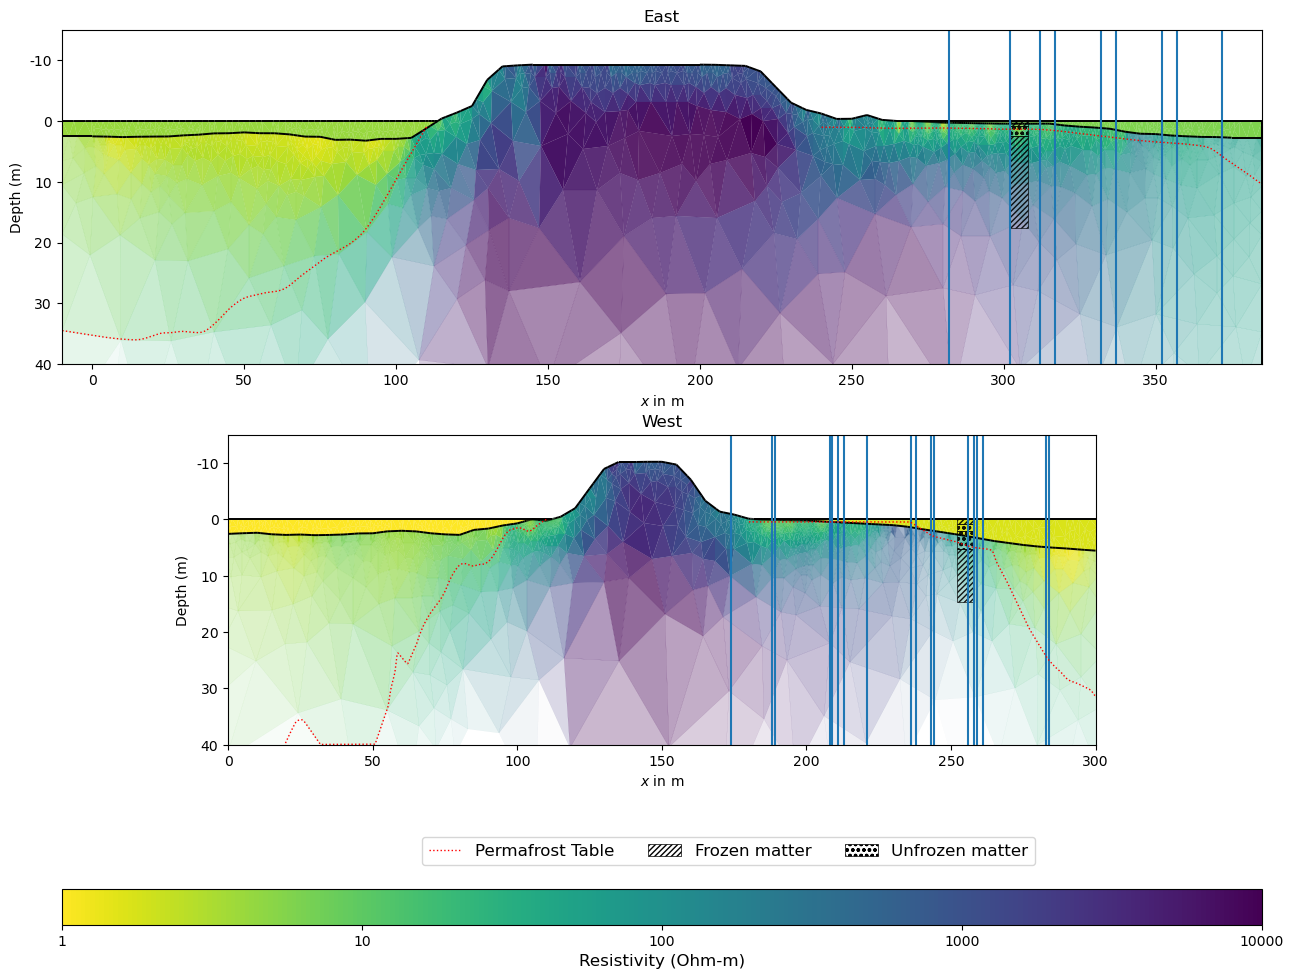

In [67]:
east_shore_df = pd.read_csv(dir + "eastshore.csv")
west_shore_df = pd.read_csv(dir + "westshore.csv")

cMin=1
cMax=10000

# If you need NumPy arrays
east_shore = east_shore_df.to_numpy()
west_shore = west_shore_df.to_numpy()

borehole4 = pd.read_csv(dir + "pygimli/borehole4.csv")
borehole2 = pd.read_csv(dir + "pygimli/borehole2.csv")

def draw1DColumn(ax, x, val, thk, hatch_patterns):
    print("Values in val:", val)
    bottom = 0
    for v, t in zip(val, thk):
        material_type = v[2]  
        if material_type not in hatch_patterns:
            print("Error: Hatch pattern not found for material:", v)
            continue
        hatch = hatch_patterns[material_type]
        ax.bar(x, t, bottom=bottom, width=6, edgecolor='black', alpha=0.9, facecolor='none', hatch=hatch, linewidth=0.5)
        bottom += t


borehole2_data = [(0, -0.9, 'Ice'), (-0.9, -2.1, 'Water'), (-2.1, -5.2, 'Unfrozen Matter'), (-5.2, -14.6, 'Ice Bonded Permafrost')]
borehole4_data = [(0, -0.9, 'Ice'), (-0.9, -2.4, 'Unfrozen Matter'), (-2.4, -17.6, 'Ice Bonded Permafrost')]

hatch_patterns = {'Ice': '//////', 'Water': 'ooo', 'Unfrozen Matter': 'ooo', 'Ice Bonded Permafrost': '//////'}

AL_e = np.loadtxt(dir + "pygimli/AL_eastern.txt")
AL_w = np.loadtxt(dir + "pygimli/AL_western.txt")

e_permafrost_table1 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table1.npy')
e_permafrost_table_smooth1 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table_smooth1.npy')
e_permafrost_table_x1 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table_x1.npy')

e_permafrost_table2 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table2.npy')
e_permafrost_table_smooth2 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table_smooth2.npy')
e_permafrost_table_x2 = np.load(dir+ 'pygimli/eastern_newrhoa_perm_table_x2.npy')

w_permafrost_table1 = np.load(dir+ 'pygimli/western_newrhoa_perm_table1.npy')
w_permafrost_table_smooth1 = np.load(dir+ 'pygimli/western_newrhoa_perm_table_smooth1.npy')
w_permafrost_table_x1 = np.load(dir+ 'pygimli/western_newrhoa_perm_table_x1.npy')

w_permafrost_table2 = np.load(dir+ 'pygimli/western_newrhoa_perm_table2.npy')
w_permafrost_table_smooth2 = np.load(dir+ 'pygimli/western_newrhoa_perm_table_smooth2.npy')
w_permafrost_table_x2 = np.load(dir+ 'pygimli/western_newrhoa_perm_table_x2.npy')

x_AL_e = AL_e[0]
z_AL_e = AL_e[1]
x_AL_w = AL_w[0]
z_AL_w = AL_w[1]

fig, ax = plt.subplots(2, 1, figsize=(30, 18))
ax0 = ax[0]
#ax1 = ax[0,1]
ax2 = ax[1]
#ax_bottom = ax[1, 1]
#ax_bottom.remove()

pg.show(mesh_eastern_newrhoa, res_eastern_newrhoa,sharey=True, logScale=True, cMap="viridis_r", ax=ax0, cMin=cMin, cMax=cMax, colorBar=False, coverage=cov_eastern_newrhoa)
#pg.show(mesh_southeast, res_southeast,  logScale=True, sharey=True, cMap="Spectral_r", ax=ax1, colorBar=False, cMin=1, cMax=100000, coverage=cov_southeast)
pg.show(mesh_western_newrhoa, res_western_newrhoa, sharey=True, logScale=True, cMap="viridis_r", ax=ax2, cMin=cMin, cMax=cMax, colorBar=False, coverage=cov_western_newrhoa)


ax0.set_ylim(-40, 15)
ax0.set_ylabel("Depth (m)")
#ax0.set_xlim()
#ax1.set_ylim(-40, 15)
#ax1.set_xlim(-120, 80)
ax2.set_ylim(-40, 15)
ax2.set_xlim(0, 300)


ax0.set_title('East')
#ax1.set_title('Southeast')
ax2.set_title('West')
ax2.set_ylabel("Depth (m)")

ax0.set_position([x0_0, y0_0, width_0, height_0])
#ax1.set_position([x0_1, y0_1, width_1, height_1])
ax2.set_position([x0_2, y0_2, width_2, height_2])

ax0.set_aspect(2)
#ax1.set_aspect(1.9)
ax2.set_aspect(1.95)

#ax0.invert_xaxis()
#ax1.invert_xaxis()
#ax2.invert_xaxis()

draw1DColumn(ax0, 305, borehole4_data, [item[1] - item[0] for item in borehole4_data], hatch_patterns)
draw1DColumn(ax2, 255, borehole2_data, [item[1] - item[0] for item in borehole2_data], hatch_patterns)

# Extracting unique years from the data
years_east = np.unique(east_shore[:, 0])

for year_east in years_east:
    ax0.axvline(year_east)

years_west = np.unique(west_shore[:, 0])

for year_west in years_west:
    ax2.axvline(year_west)

line1, = ax0.plot(e_permafrost_table_x1, e_permafrost_table_smooth1, ":", linewidth=1, color='red', label='Permafrost Table')
line2, = ax0.plot(e_permafrost_table_x2, e_permafrost_table_smooth2, ":", linewidth=1, color='red')
#line3, = ax1.plot(s_permafrost_table_x, s_permafrost_table_smooth, ":", linewidth=1, color='red')
line4, = ax2.plot(w_permafrost_table_x1, w_permafrost_table_smooth1, ":", linewidth=1, color='red')
line5, = ax2.plot(w_permafrost_table_x2, w_permafrost_table_smooth2, ":", linewidth=1, color='red')
#vline1 = ax0.axvline(x=80, color='gray', linestyle='-', linewidth=0.1, label='_nolegend_')
#vline2 = ax2.axvline(x=-10, color='gray', linestyle='-', linewidth=0.1, label='_nolegend_')
#ax0.add_patch(Rectangle((80, -40), -90, 55, linewidth=0.1, edgecolor='black', facecolor='gray', alpha=0.15, label='East and Southeast overlap'))
#ax1.add_patch(Rectangle((80, -40), -90, 55, linewidth=0.1, edgecolor='black', facecolor='gray', alpha=0.15))
#ax1.xaxis.set_major_locator(MultipleLocator(50))
#ax0.plot(x_AL_e, z_AL_e, 'g_', linewidth=1)
#ax2.plot(x_AL_w, z_AL_w, 'g_', linewidth=1)

hatch_patterns = {'Frozen matter': '//////', 'Unfrozen matter': 'ooo'}
handles, labels = ax0.get_legend_handles_labels()
legend_patches = [Rectangle((0, 0), 1, 1, fc='none', ec='black', lw=0.5, hatch=hatch_patterns[mat]) for mat in hatch_patterns]
extended_symbol_patch = plt.Line2D([0, 0.5], [0, 0], color='g', linewidth=0.5)
all_handles = handles + legend_patches 
#ax0.legend(handles=all_handles, labels=labels + list(hatch_patterns.keys()) + ['Active Layer Probe'], loc=(0.43, -2.6), fontsize=8, ncol=2)
#ax2.legend(handles=all_handles, labels=labels + list(hatch_patterns.keys()), loc='center', fontsize=10, ncol=3)
ax0.legend(handles=all_handles, labels=labels + list(hatch_patterns.keys()), loc=(0.3, -1.5), fontsize=12, ncol=3)
cax = fig.add_axes([0.3, 0.2, 0.4, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, logScale=True, cMin=cMin, cMax= cMax, cMap="viridis_r")

#plt.subplots_adjust(hspace=0)
cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Resistivity (Ohm-m)', fontsize=12)
years_west

hoevmueller With historical shoreline positions

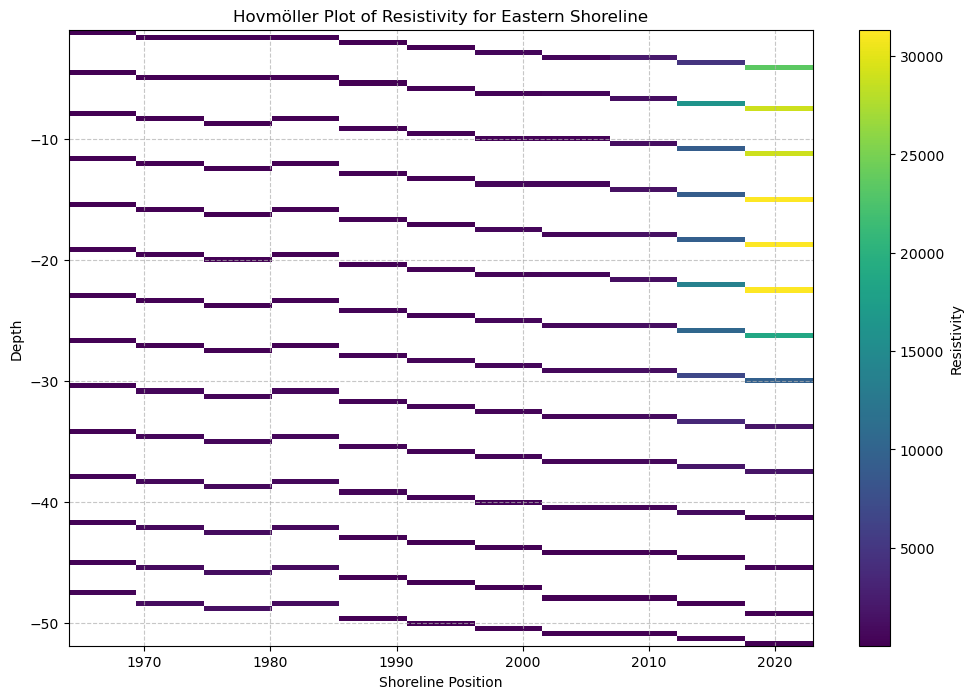

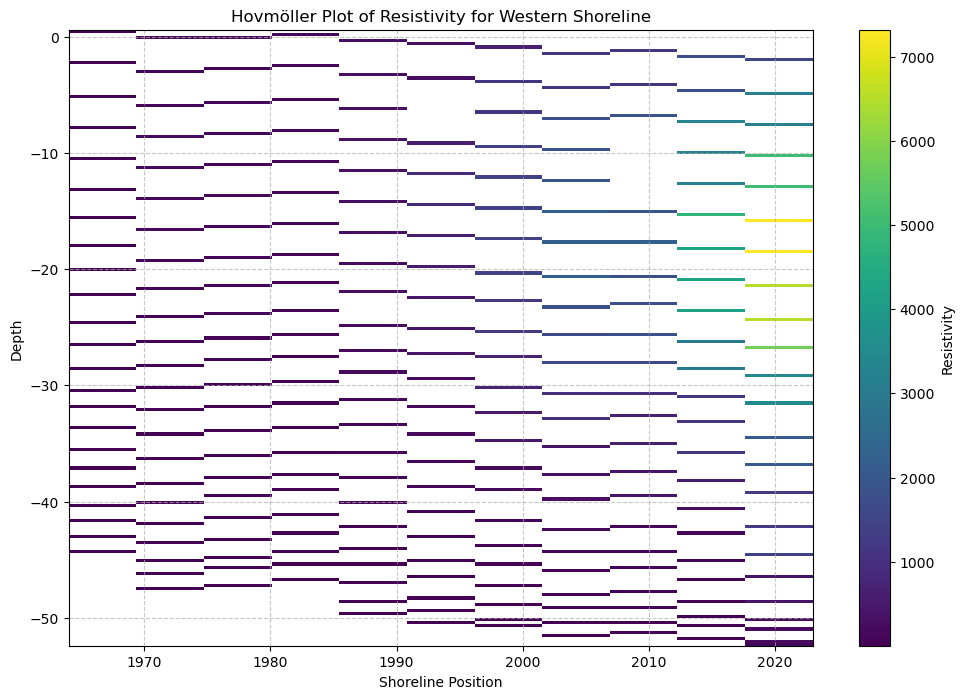

In [86]:
east_shore_df = pd.read_csv(dir + "pygimli/shorelines_gimli_eastern_and_south.csv")
west_shore_df = pd.read_csv(dir + "pygimli/shorelines_gimli_western.csv")

# If you need NumPy arrays
east_shore = east_shore_df.to_numpy()
west_shore = west_shore_df.to_numpy()

def preprocess_data(data):
    # Extract columns
    x_positions = data[:, 3]
    depths = data[:, 1]
    resistivity = data[:, 2]
    
    # Get unique x positions and depths
    unique_x = np.unique(x_positions)
    unique_depths = np.unique(depths)
    
    # Initialize the resistivity matrix
    resistivity_matrix = np.full((len(unique_x), len(unique_depths)), np.nan)

    for i, x in enumerate(unique_x):
        for j, depth in enumerate(unique_depths):
            # Get the resistivity value at this (x, depth) combination
            mask = (x_positions == x) & (depths == depth)
            if np.any(mask):
                # Take the average if there are multiple readings
                resistivity_matrix[i, j] = np.mean(resistivity[mask])
    
    return unique_x, unique_depths, resistivity_matrix

# Process east and west shore datasets
east_x_positions, east_depths, east_resistivity = preprocess_data(east_shore)
west_x_positions, west_depths, west_resistivity = preprocess_data(west_shore)

# Plotting for the east shore
plt.figure(figsize=(12, 8))
plt.imshow(east_resistivity.T, aspect='auto', extent=[east_x_positions.min(), east_x_positions.max(), east_depths.min(), east_depths.max()], cmap='viridis')
plt.colorbar(label='Resistivity')
plt.xlabel('Shoreline Position')
plt.ylabel('Depth')
plt.title('Hovmöller Plot of Resistivity for Eastern Shoreline')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plotting for the west shore
plt.figure(figsize=(12, 8))
plt.imshow(west_resistivity.T, aspect='auto', extent=[west_x_positions.min(), west_x_positions.max(), west_depths.min(), west_depths.max()], cmap='viridis')
plt.colorbar(label='Resistivity')
plt.xlabel('Shoreline Position')
plt.ylabel('Depth')
plt.title('Hovmöller Plot of Resistivity for Western Shoreline')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

With historical shoreline positions 

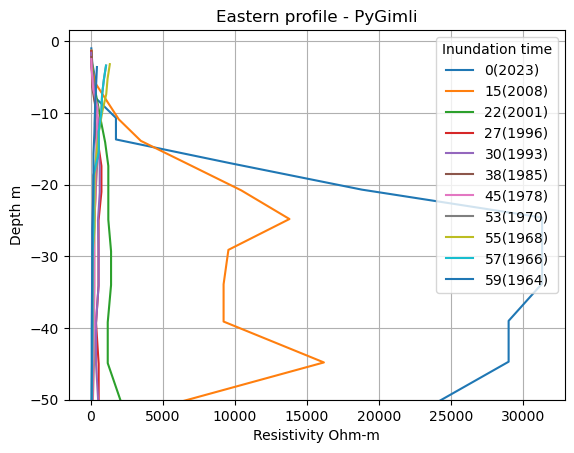

In [7]:
east_shore_df = pd.read_csv(dir + "pygimli/shorelines_gimli_eastern_and_south.csv")
west_shore_df = pd.read_csv(dir + "pygimli/shorelines_gimli_western.csv")

# If you need NumPy arrays
east_shore = east_shore_df.to_numpy()
west_shore = west_shore_df.to_numpy()


years = np.unique(east_shore[:, 4])

# Plotting each year's resistivity values with depth
for year in years:
    # Selecting data for the current year
    data_year = east_shore[east_shore[:, 4] == year]
    data_year_time = east_shore[east_shore[:, 3] == year]
    # Sorting the data based on depth
    
    # Plotting
    plt.plot(data_year[:, 2], data_year[:, 1], label=str(int(year)) + f'({int(2023 - year)})')

# Adding labels and legend
plt.ylabel('Depth m')
plt.ylim(-50)
plt.xlabel('Resistivity Ohm-m')
plt.title('Eastern profile - PyGimli')
plt.legend(title='Inundation time')
plt.grid(True)
plt.show()

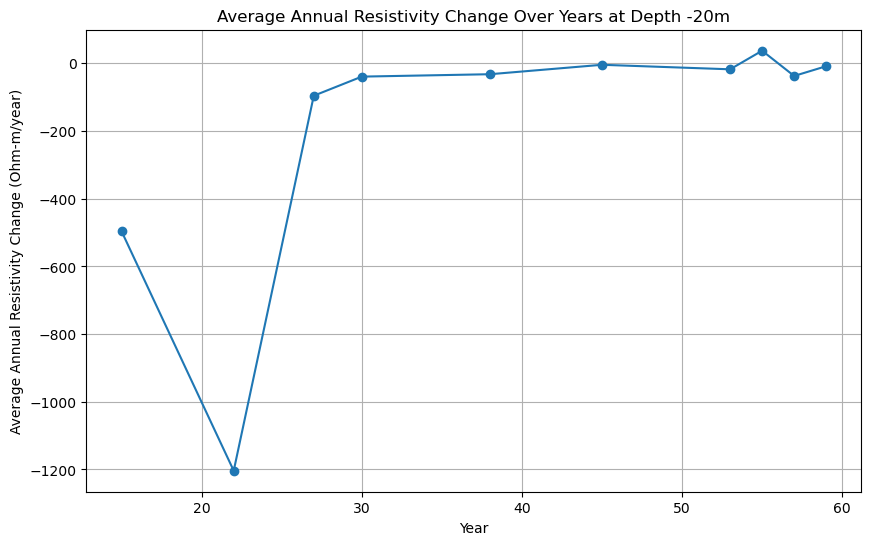

In [15]:
years = np.unique(east_shore[:, 4])

# Prepare a list to store the results
results = []

for year in years:
    # Select data for the current year
    data_year = east_shore[east_shore[:, 4] == year]
    
    if len(data_year) > 0:
        # Sort the data based on depth
        data_year = data_year[np.argsort(data_year[:, 1])]
        
        # Interpolate for depth -20m
        depths = data_year[:, 1]
        resistivities = data_year[:, 2]
        
        # Create interpolation function
        interp_func = interp1d(depths, resistivities, kind='linear', fill_value='extrapolate')
        
        # Interpolate at depth -20m
        resistivity_at_20m = interp_func(-20)
        
        # Store the result
        results.append({'Year': year, 'Resistivity_at_-20m': resistivity_at_20m})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Calculate average annual change in resistivity
change_list = []
years_between = []

for i in range(len(results_df) - 1):
    year1 = results_df.iloc[i]['Year']
    year2 = results_df.iloc[i + 1]['Year']
    resistivity1 = results_df.iloc[i]['Resistivity_at_-20m']
    resistivity2 = results_df.iloc[i + 1]['Resistivity_at_-20m']
    
    change = resistivity2 - resistivity1
    years_between.append(year2 - year1)
    change_list.append(change / (year2 - year1))

# Ensure lengths are consistent
if len(change_list) == len(results_df) - 1:
    # Create DataFrame for plotting
    change_df = pd.DataFrame({
        'Start_Year': results_df['Year'].iloc[:-1].values,
        'End_Year': results_df['Year'].iloc[1:].values,
        'Average_Annual_Change': change_list
    })
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(change_df['End_Year'], change_df['Average_Annual_Change'], marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel('Average Annual Resistivity Change (Ohm-m/year)')
    plt.title('Average Annual Resistivity Change Over Years at Depth -20m')
    plt.grid(True)
    plt.show()

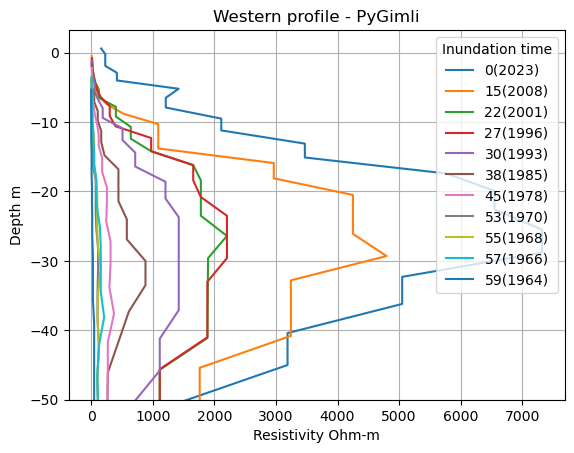

In [8]:
years = np.unique(west_shore[:, 4])

# Plotting each year's resistivity values with depth
for year in years:
    # Selecting data for the current year
    data_year = west_shore[west_shore[:, 4] == year]
    data_year_time = west_shore[west_shore[:, 3] == year]
    # Sorting the data based on depth
    
    # Plotting
    plt.plot(data_year[:, 2], data_year[:, 1], label=str(int(year)) + f'({int(2023 - year)})')

# Adding labels and legend
plt.ylabel('Depth m')
plt.ylim(-50)
plt.xlabel('Resistivity Ohm-m')
plt.title('Western profile - PyGimli')
plt.legend(title='Inundation time')
plt.grid(True)
plt.show()

NameError: name 'cmap' is not defined

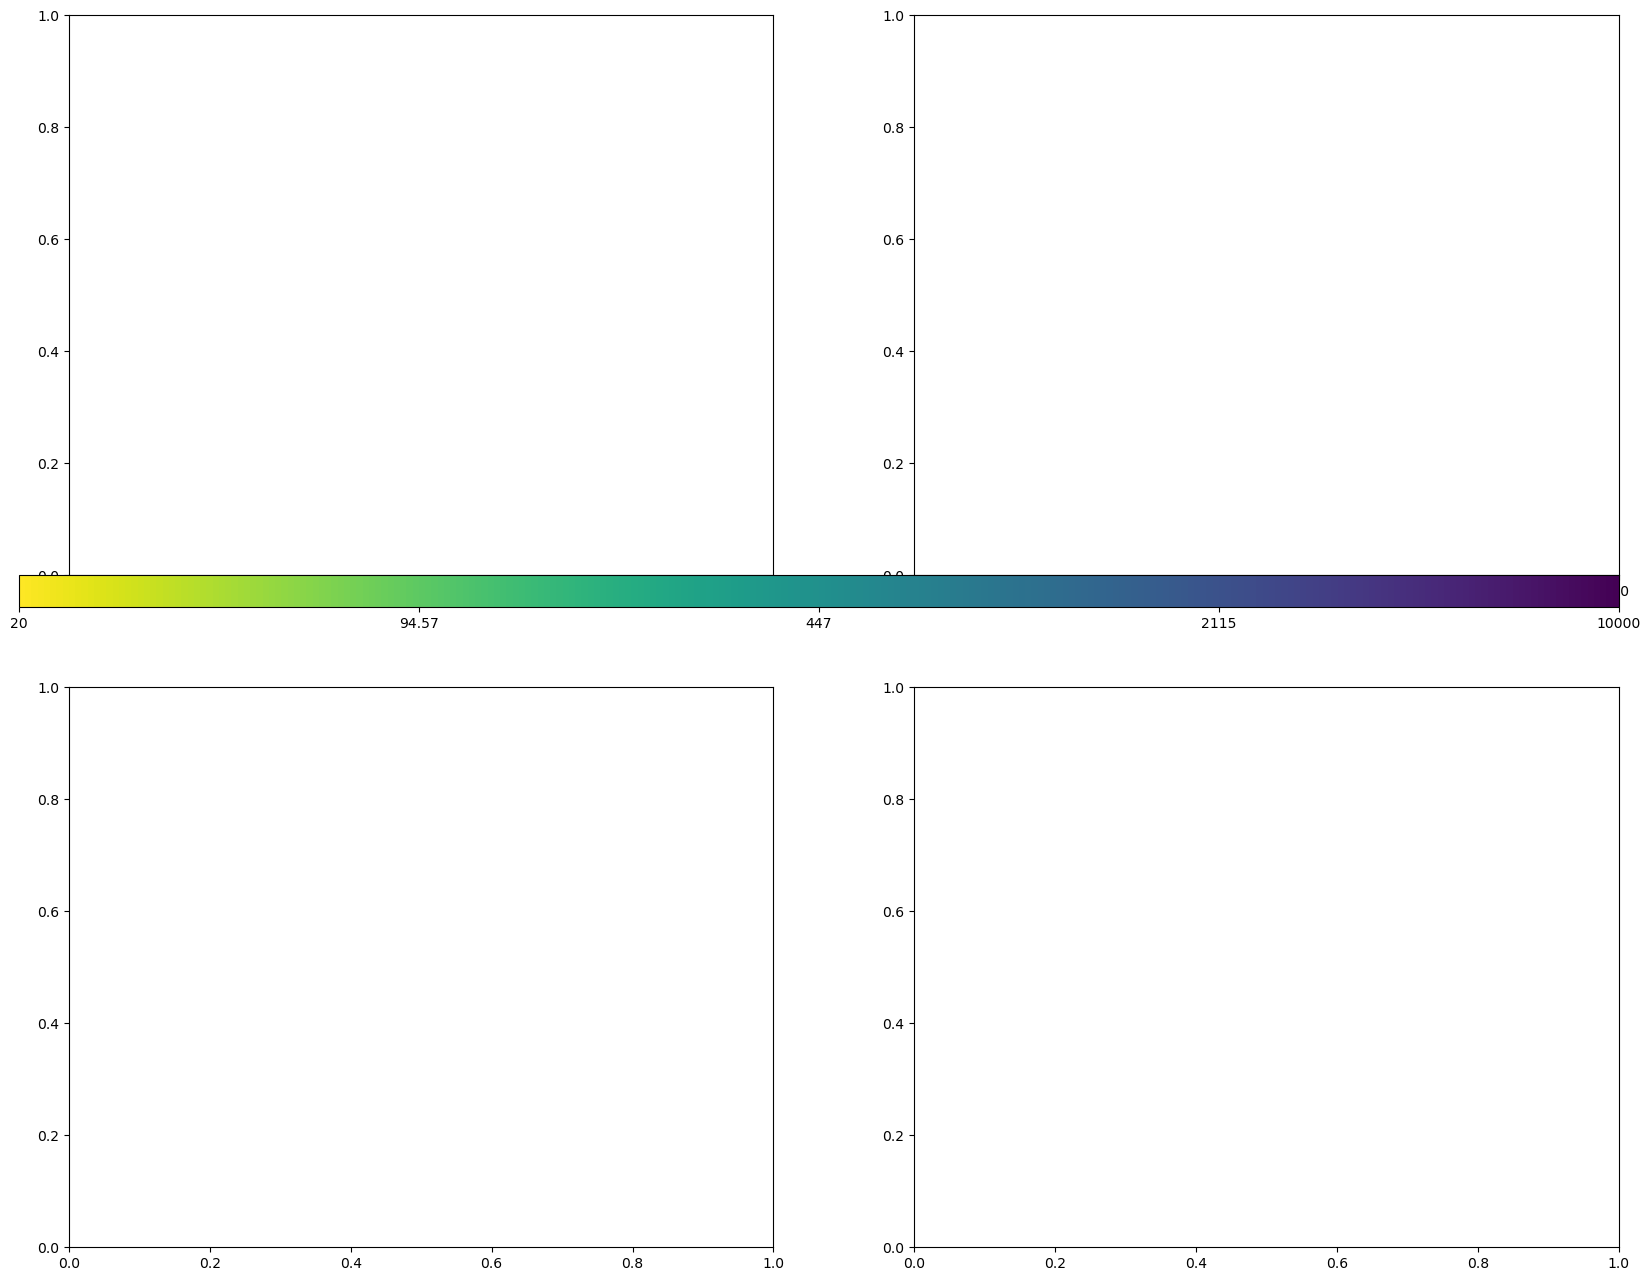

In [69]:
img_eastern = mpimg.imread(dir+'paper/figures/eastgis1.png')
img_western = mpimg.imread(dir+'paper/figures/westgis1.png')


AL_e = np.loadtxt(dir + "pygimli/AL_eastern_parallel_to_shore.txt")
AL_w = np.loadtxt(dir + "pygimli/AL_western_parallel_to_shore.txt")

x_AL_e = AL_e[:, 0]
z_AL_e = AL_e[:, 1]
x_AL_w = AL_w[:, 0]
z_AL_w = AL_w[:, 1]

fig, ax = plt.subplots(2, 2, figsize=(20, 16))

cax = fig.add_axes([0.1, 0.51, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, logScale=True, cMin=20, cMax=10000,cMap="viridis_r")

pg.show(mesh_western_perpendicular, res_western_perpendicular, cMap=cmap, ax=ax[0][0], colorBar=False, logScale=True, cMin=100, cMax=10000, sharey = True, coverage=cov_western_perpendicular)
pg.show(mesh_eastern_perpendicular, res_eastern_perpendicular, cMap=cmap, ax=ax[0][1], colorBar=False,logScale=True, cMin=100, cMax=10000, sharey = True, coverage=cov_eastern_perpendicular)

ax[0][0].invert_xaxis()
ax[0][1].invert_xaxis()

ax[1][1].imshow(img_eastern)
ax[1][1].axis('off')  


ax[1][0].imshow(img_western)
ax[1][0].axis('off')  

ax[0][0].set_title('West', fontsize=14)
ax[0][1].set_title('East', fontsize=14)

ax[0][0].set_ylim(-80, 15)
ax[0][1].set_ylim(-80, 15)
#ax[0][0].plot(x_AL_w, z_AL_w, 'r--', linewidth=2)
#ax[0][1].plot(x_AL_e, z_AL_e, 'r--', linewidth=2)

cax.set_xlabel('Resistivity (Ohm-m)', fontsize=12)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.8) 

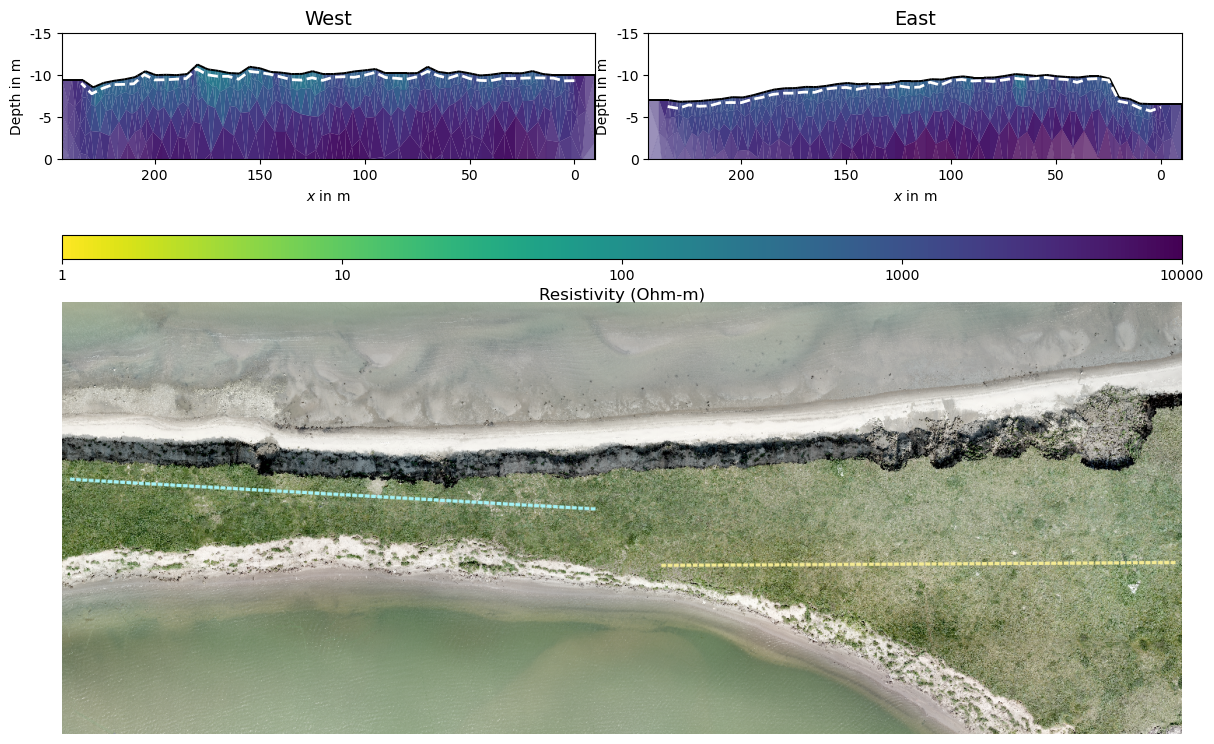

In [79]:
#img_eastern = mpimg.imread(dir+'paper/figures/eastgis1.png')
#img_western = mpimg.imread(dir+'paper/figures/westgis1.png')
img = mpimg.imread(dir+'paper/figures/bothgis.png')
cMin=1
cMax=10000

AL_e = np.loadtxt(dir + "pygimli/AL_eastern_parallel_to_shore.txt")
AL_w = np.loadtxt(dir + "pygimli/AL_western_parallel_to_shore.txt")

x_AL_e = AL_e[:, 0]
z_AL_e = AL_e[:, 1]
x_AL_w = AL_w[:, 0]
z_AL_w = AL_w[:, 1]

fig = plt.figure(figsize=(14, 16))
gs = gridspec.GridSpec(2, 2)

# Create the first subplot in the first row and first column
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, :])

cax = fig.add_axes([0.1, 0.53, 0.8, 0.015])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, logScale=True, cMin=cMin, cMax=cMax,cMap="viridis_r")

pg.show(mesh_western_perpendicular, res_western_perpendicular, cMap="viridis_r", ax=ax0, cMin=cMin, cMax=cMax, colorBar=False, logScale=True, sharey = True, coverage=cov_western_perpendicular)
pg.show(mesh_eastern_perpendicular, res_eastern_perpendicular, cMap="viridis_r", ax=ax1, cMin=cMin, cMax=cMax, colorBar=False,logScale=True,  sharey = True, coverage=cov_eastern_perpendicular)

ax0.invert_xaxis()
ax1.invert_xaxis()

#ax[1][1].imshow(img_eastern)
#ax[1][1].axis('off')  


ax2.imshow(img)
ax2.axis('off')  

ax0.set_title('West', fontsize=14)
ax1.set_title('East', fontsize=14)

ax0.set_ylim(0, 15)
ax1.set_ylim(0, 15)
ax0.plot(x_AL_w, z_AL_w, 'w--', linewidth=2)
ax1.plot(x_AL_e, z_AL_e, 'w--', linewidth=2)


ax0.set_aspect(4)
ax1.set_aspect(4)

cax.set_xlabel('Resistivity (Ohm-m)', fontsize=12)
cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Resistivity (Ohm-m)', fontsize=12)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.8) 